In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [90]:
data = pd.read_csv('/content/drive/MyDrive/dataset_35_dermatology.csv')

In [85]:
#Basic Checks

data.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like_infiltrate  Age  class  
0                     0   55      2  
1                     0    8      1  
2                     3   26      3  
3                     0   40      1  
4                     3   45      3  

[5 rows x 35 columns]

In [86]:
data.tail()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
361                              0                     0   
362                              0                     0   
363                              3                     0   
364                              1                     0   
365                              0                     0   

     perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
361                             0                                    2   
362                             0                                    2   
363                             0                                    2   
364                             0                                    2   
365                             0                                    3   

     band-like_infiltrate  Age  class  
361                     0   25      4  
362                     0   36      4  
363                     3   28      3  
364                     3   50      3  
365                     0   35      1  

[5 rows x 35 columns]

In [87]:
data.columns


Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [88]:
data.duplicated().sum()

0

In [91]:
#Target Variable

data['class'].unique()

array([2, 1, 3, 5, 4, 6])

In [92]:
data['class'].value_counts()

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

In [93]:
#Checking datatypes of columns

data.dtypes

erythema                                     int64
scaling                                      int64
definite_borders                             int64
itching                                      int64
koebner_phenomenon                           int64
polygonal_papules                            int64
follicular_papules                           int64
oral_mucosal_involvement                     int64
knee_and_elbow_involvement                   int64
scalp_involvement                            int64
family_history                               int64
melanin_incontinence                         int64
eosinophils_in_the_infiltrate                int64
PNL_infiltrate                               int64
fibrosis_of_the_papillary_dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing_of_the_rete_ridges    

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [95]:
data.describe()

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  focal_hypergranulosis  \
count         366.000000  ...             366.000000   
mean            0.519126  ...               0.393443   
std             0.905639  ...               0.849406   
min             0.000000  ...               0.000000   
25%             0.000000  ...               0.000000   
50%             0.000000  ...               0.000000   
75%             1.000000  ...               0.000000   
max             3.000000  ...               3.000000   

       disappearance_of_the_granular_layer  \
count                           366.000000   
mean                              0.464481   
std                               0.864899   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               3.000000   

       vacuolisation_and_damage_of_basal_layer  spongiosis  \
count                               366.000000  366.000000   
mean                                  0.456284    0.953552   
std                                   0.954873    1.130172   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth_appearance_of_retes  follicular_horn_plug  \
count                     366.000000            366.000000   
mean                        0.453552              0.103825   
std                         0.954744              0.450433   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
count                    366.000000                           366.000000   
mean                       0.114754                             1.8661

In [96]:
data.describe(include = 'O')

Age
count   366
unique   61
top      40
freq     17

In [97]:
data.shape

(366, 35)

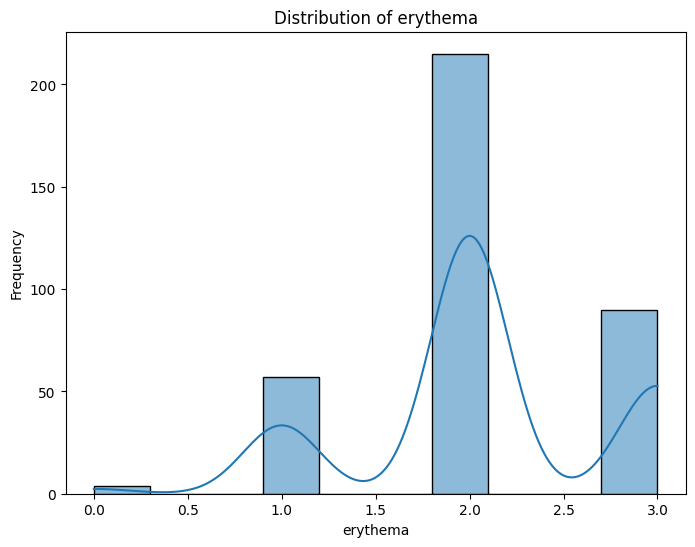

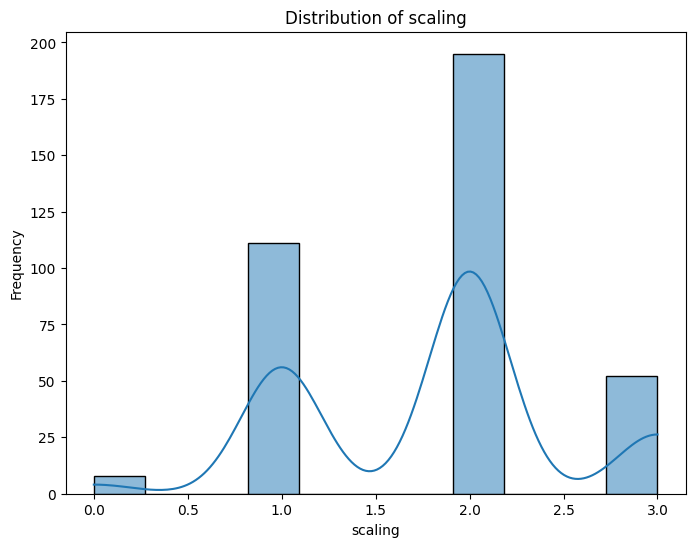

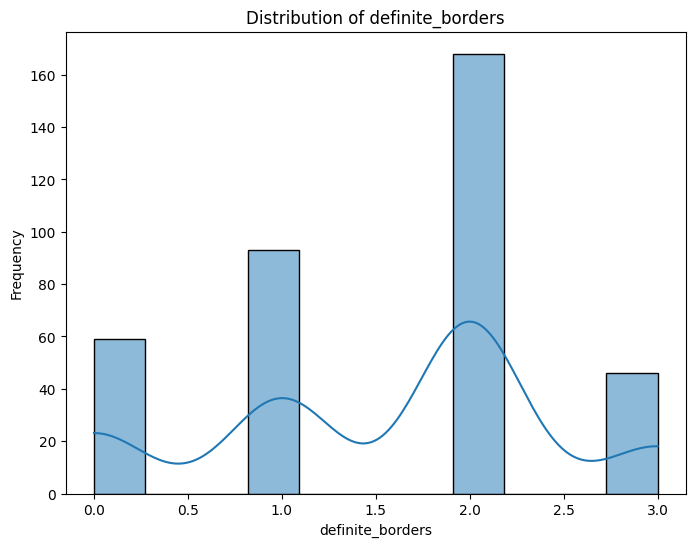

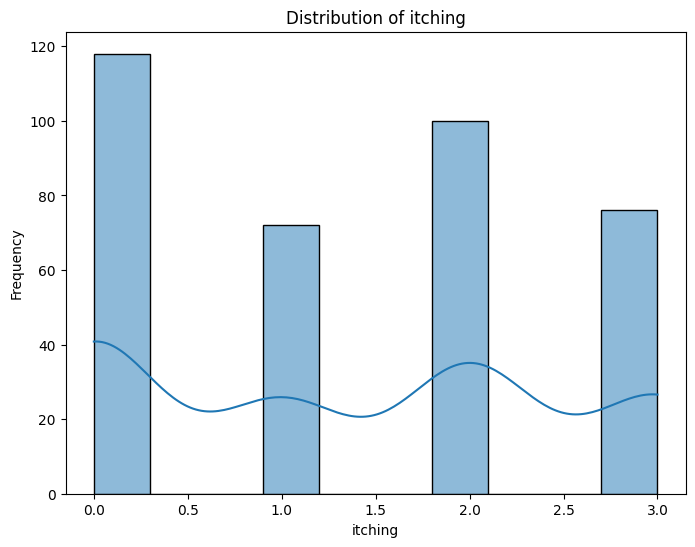

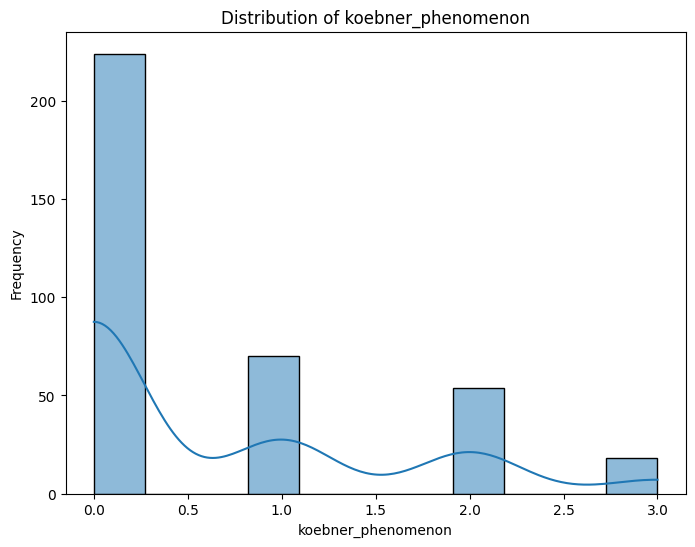

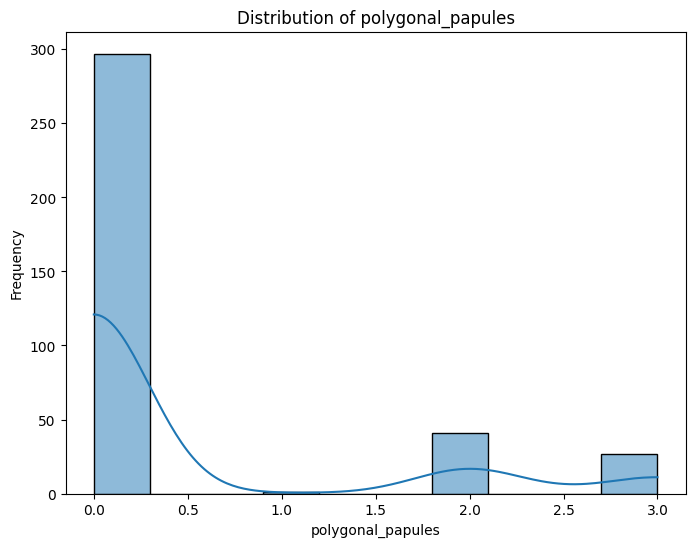

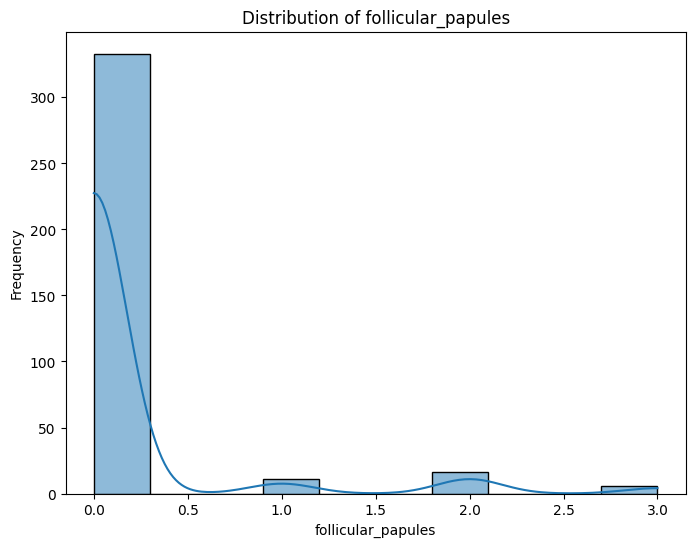

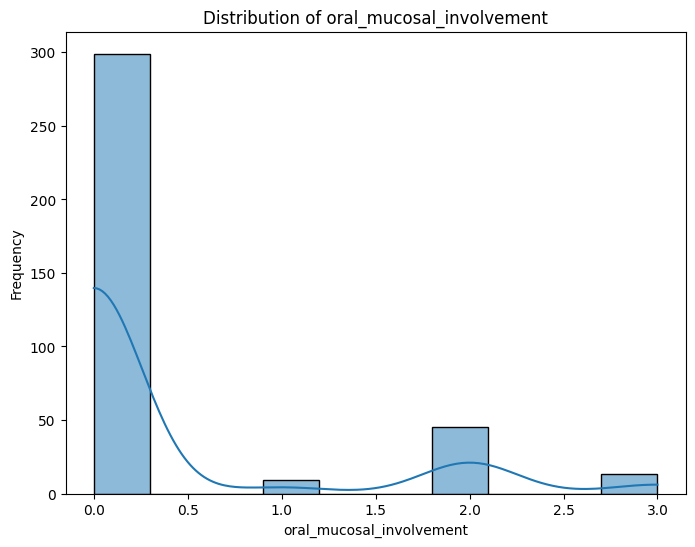

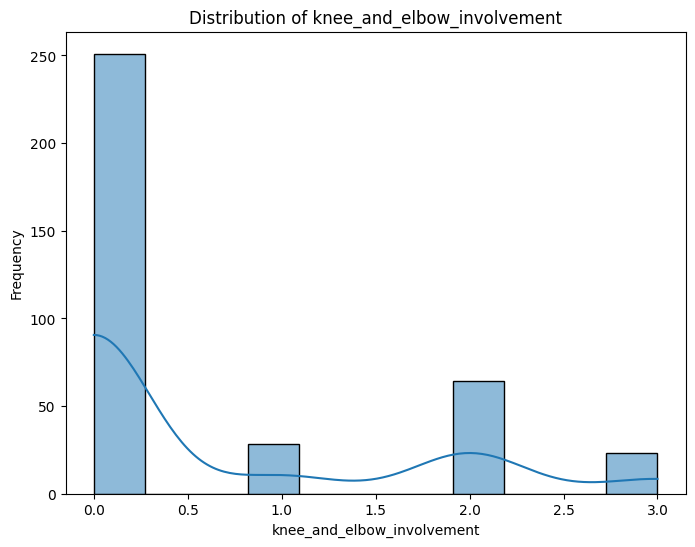

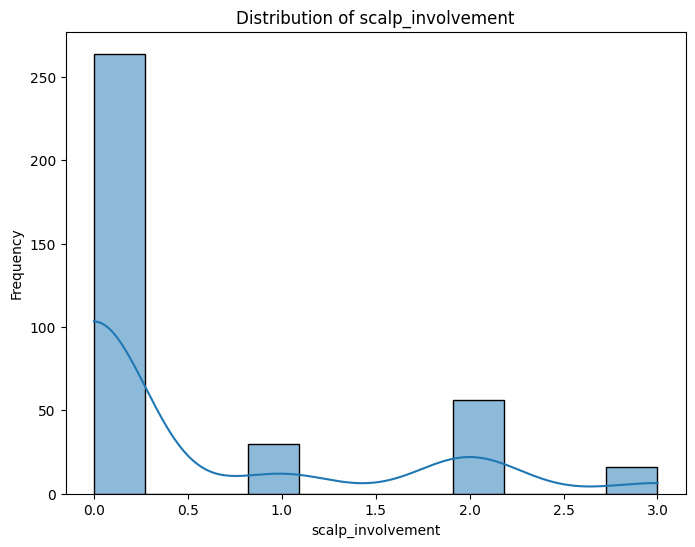

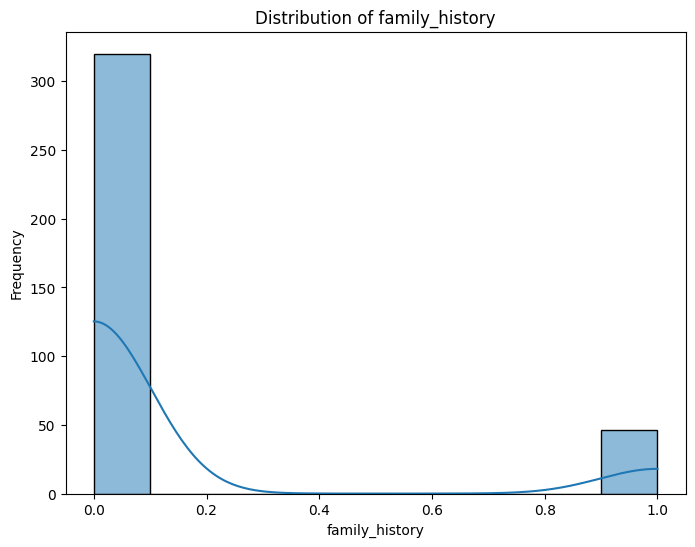

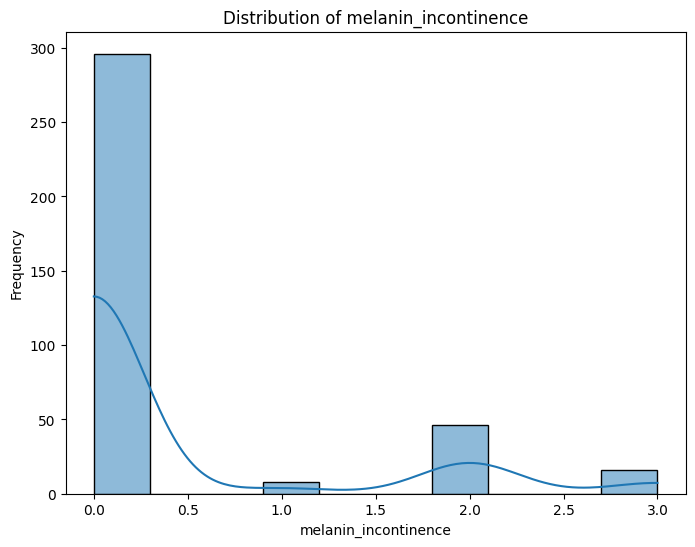

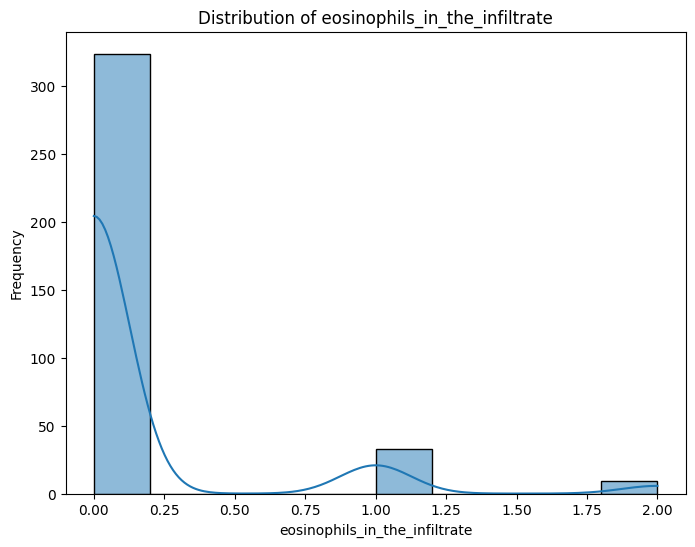

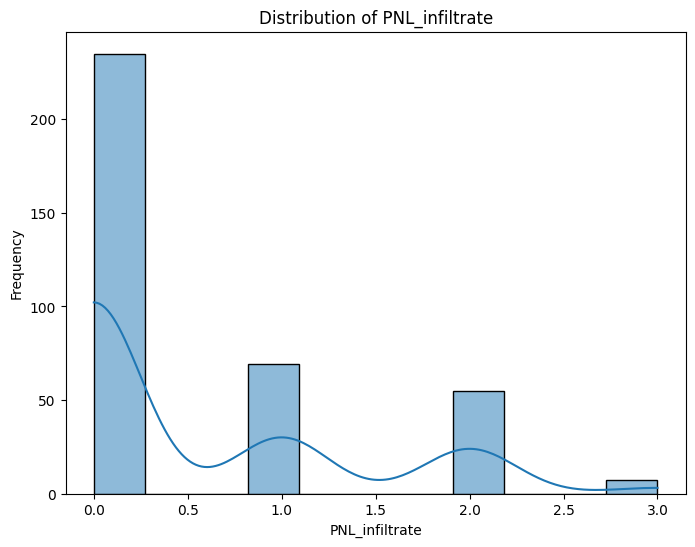

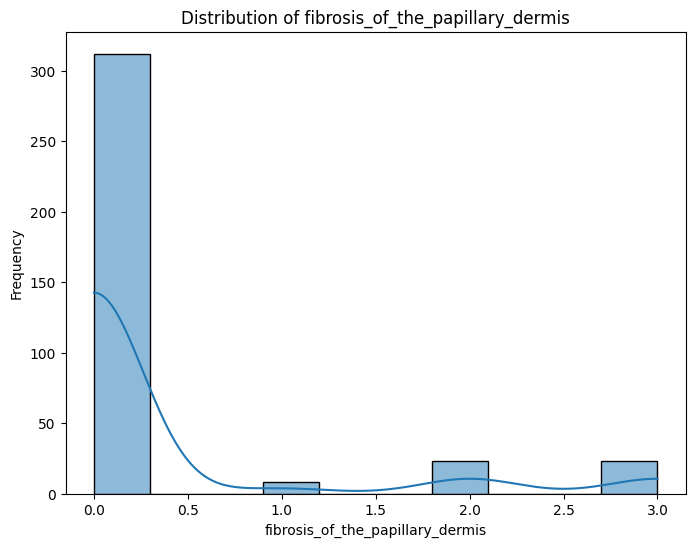

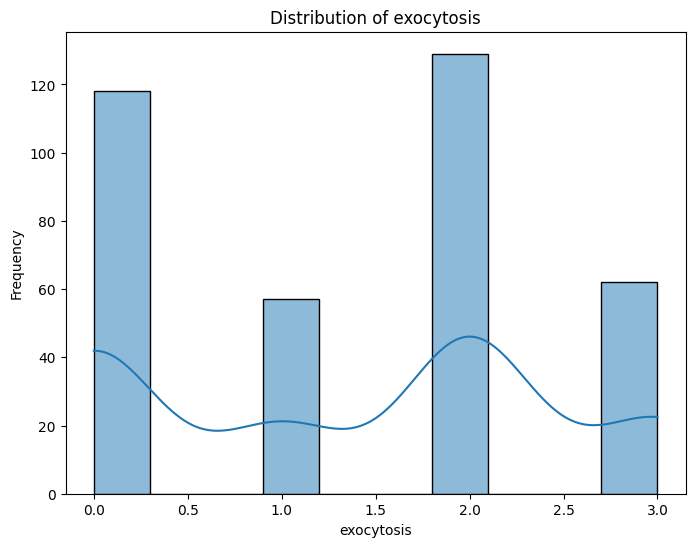

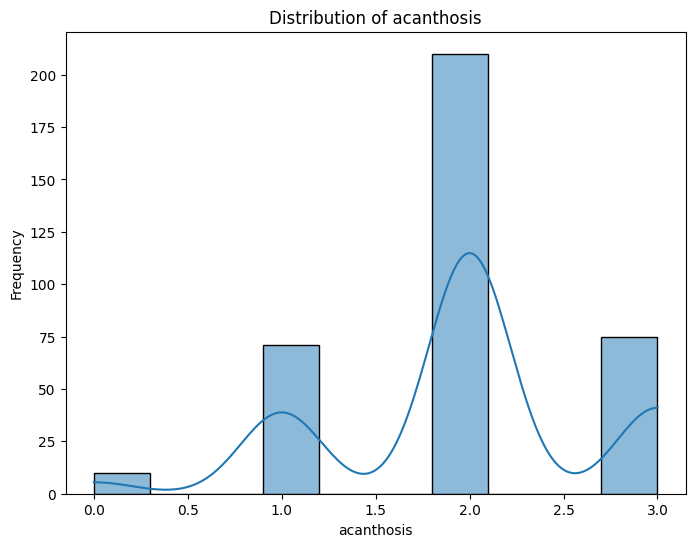

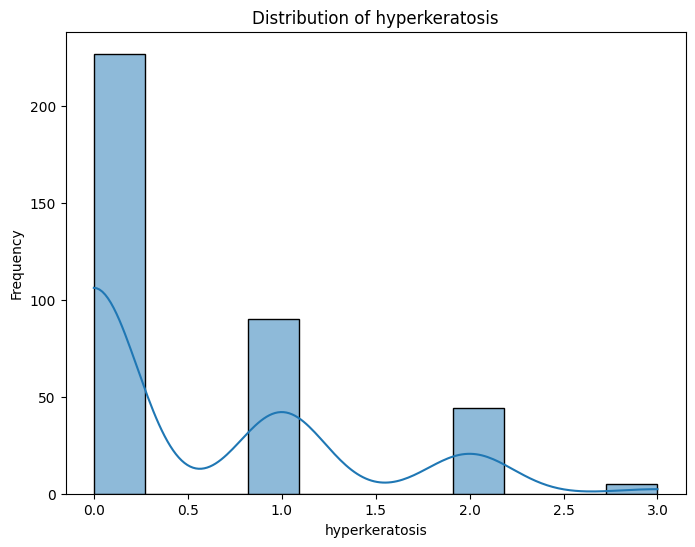

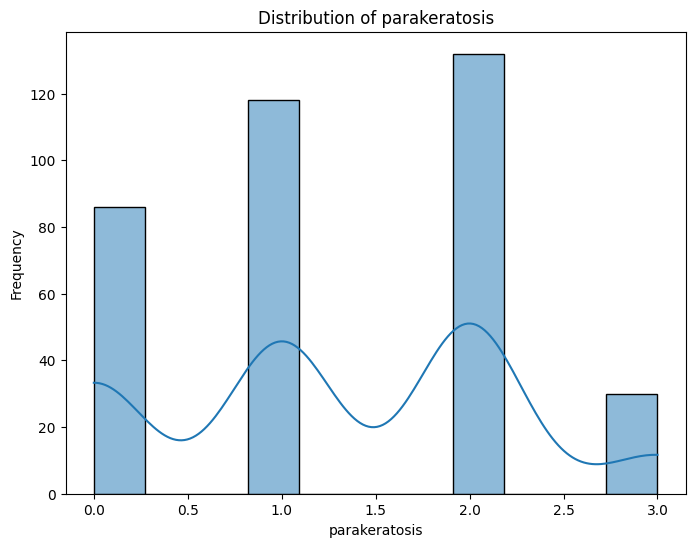

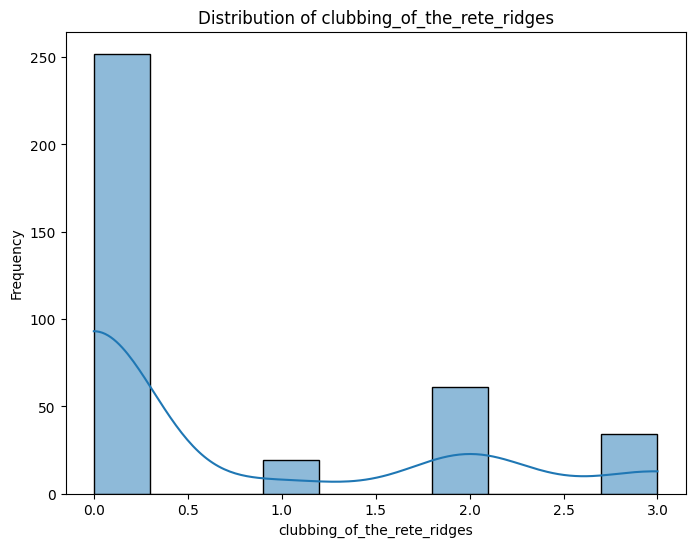

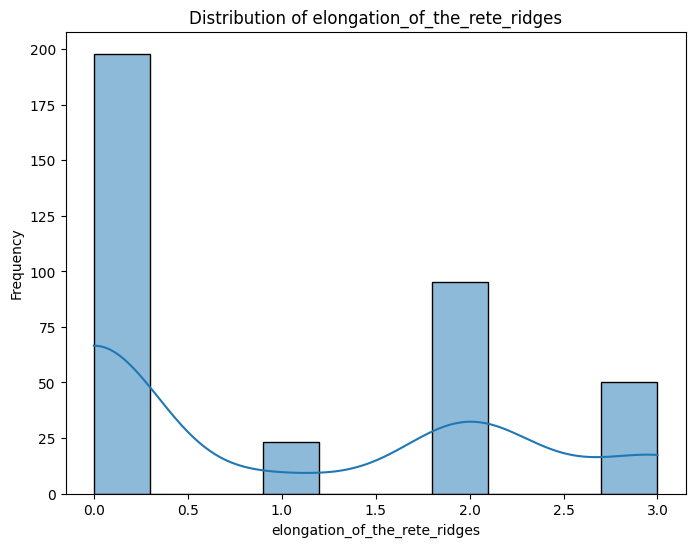

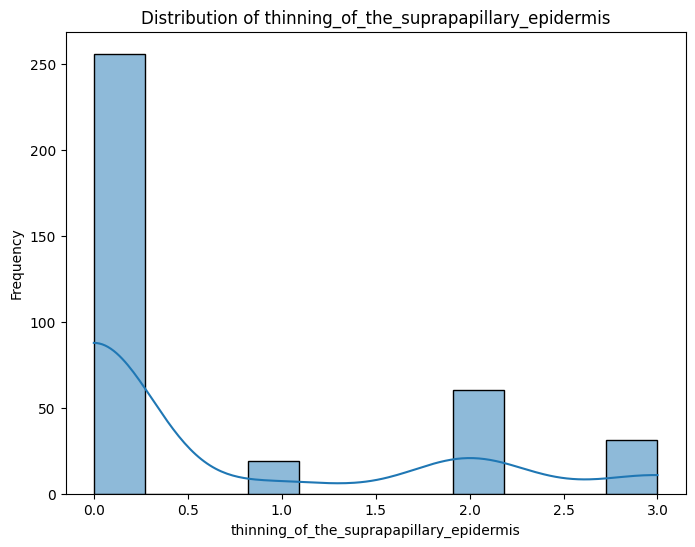

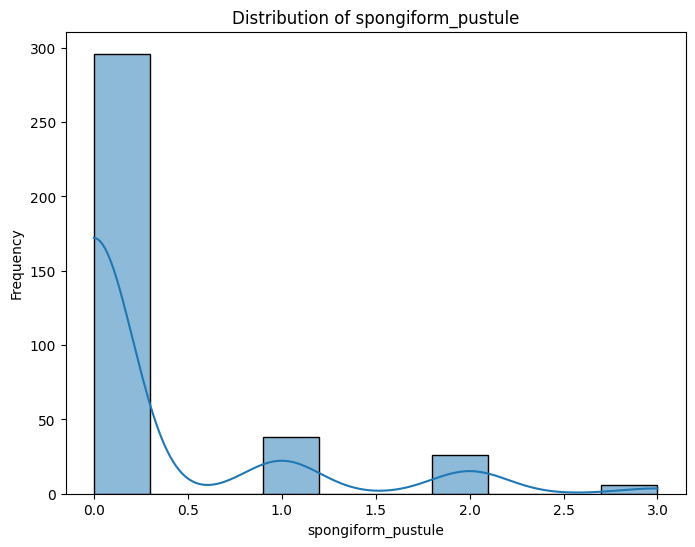

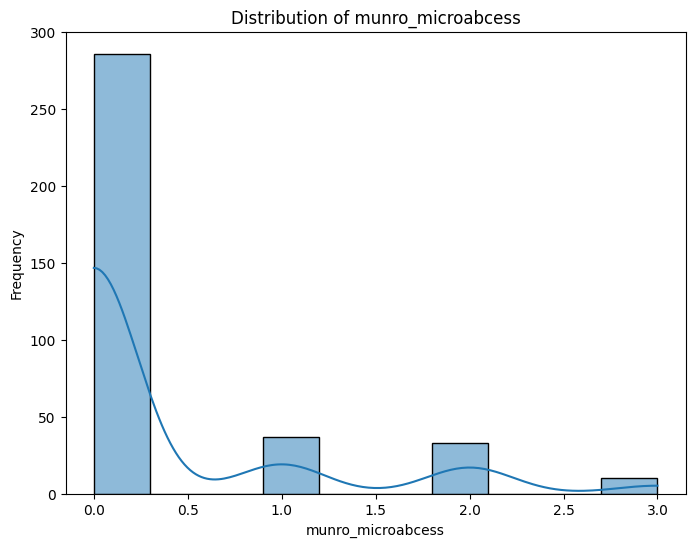

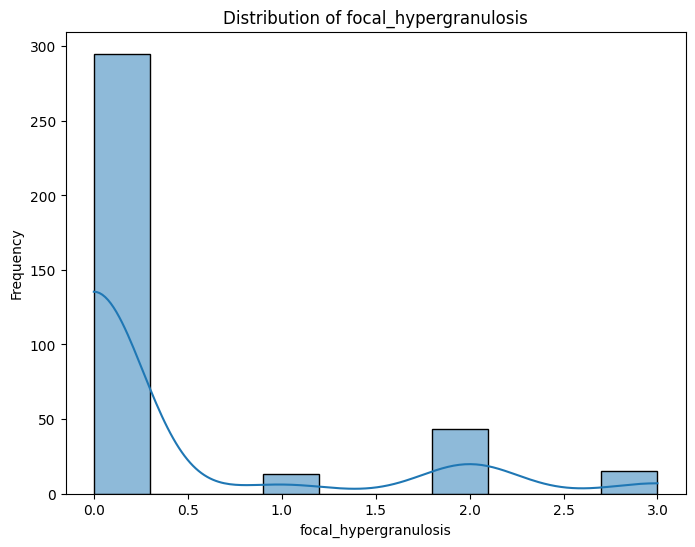

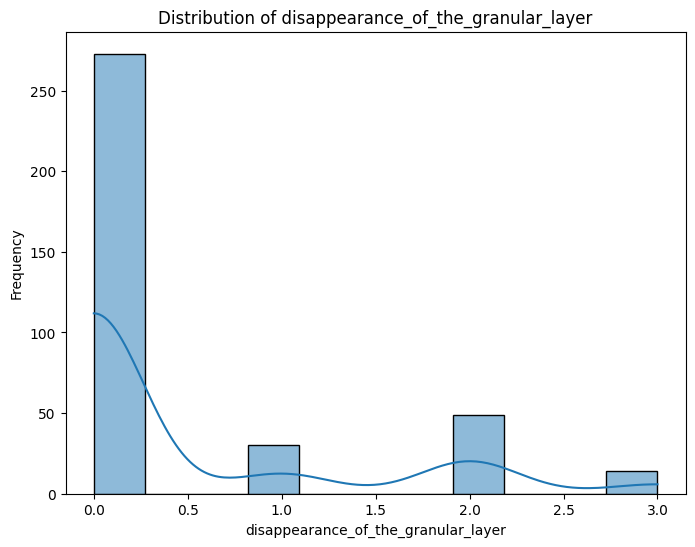

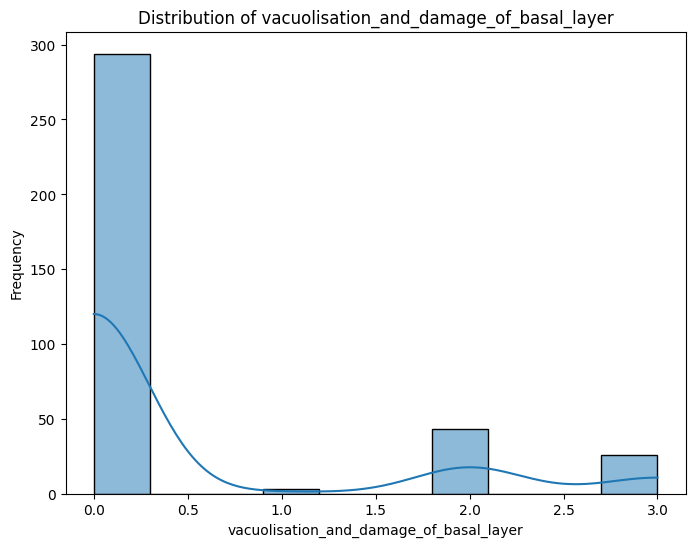

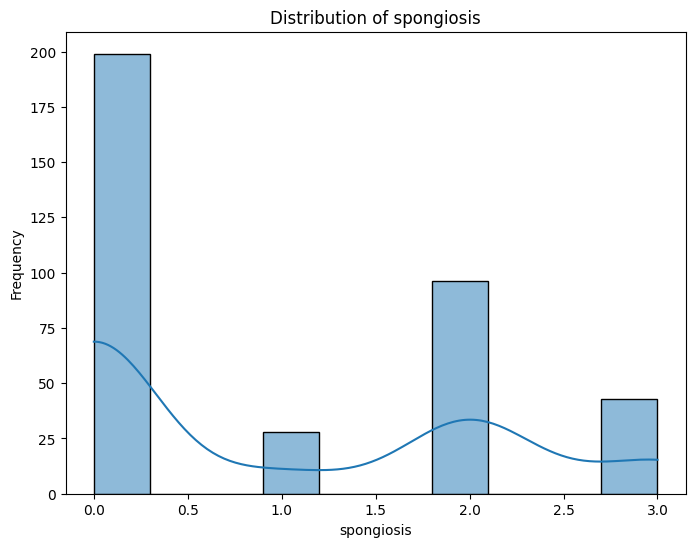

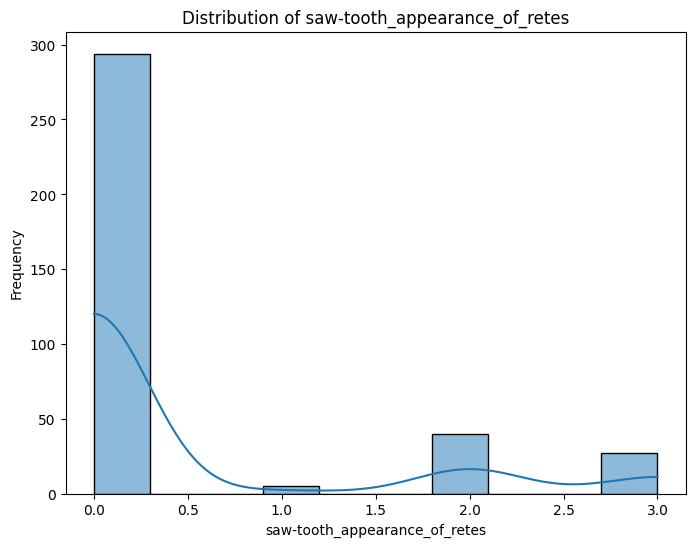

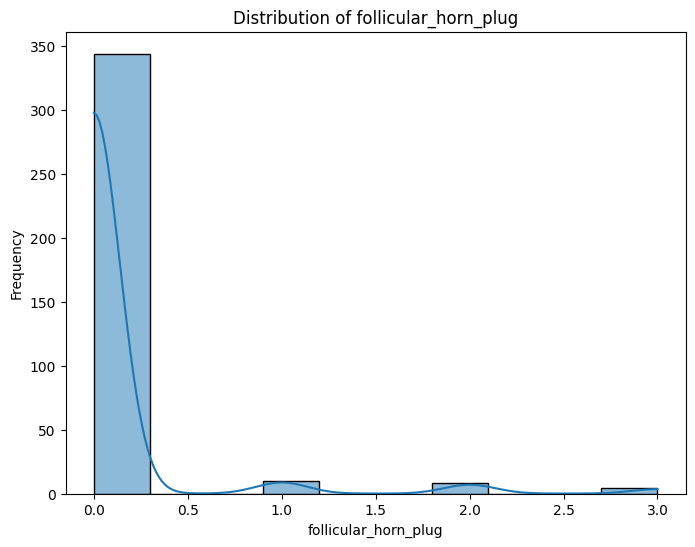

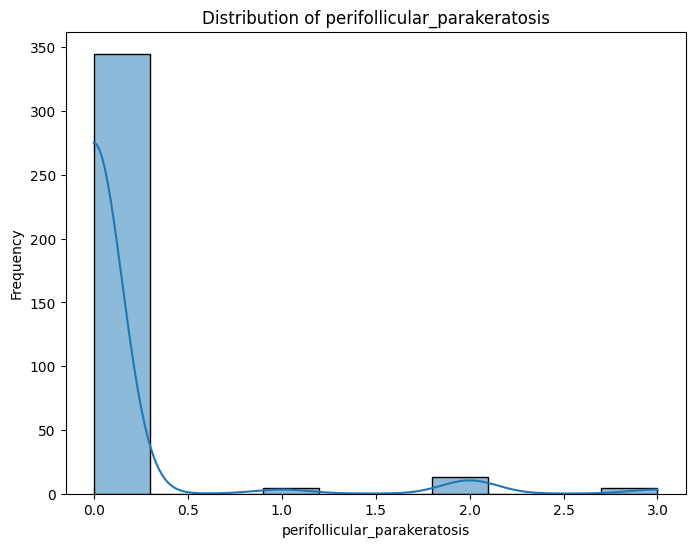

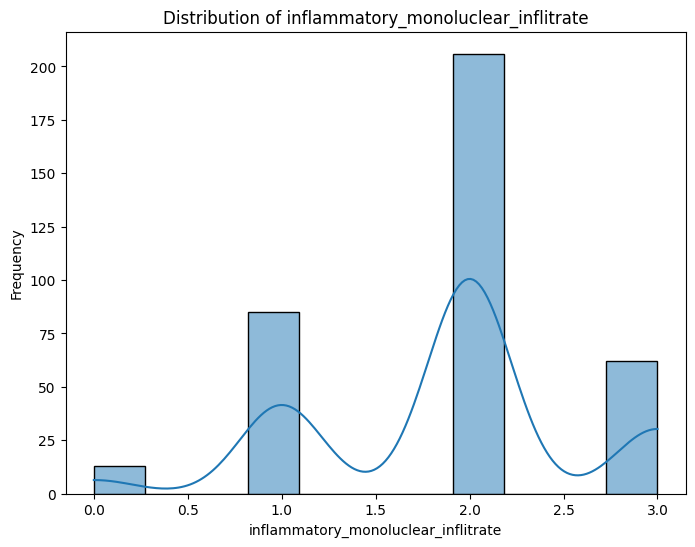

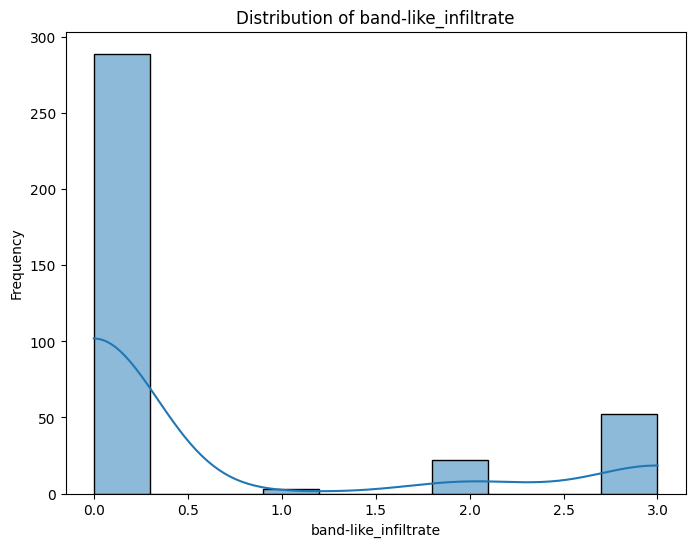

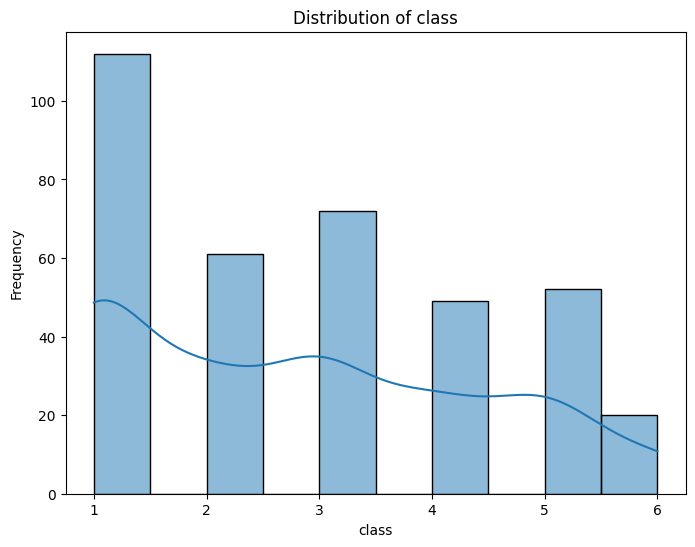

In [98]:
#univariant analysis
numerical_columns = data.select_dtypes(include=['int', 'float']).columns

# Visualize each numerical column separately
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)  # Use sns.histplot for a histogram with KDE
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

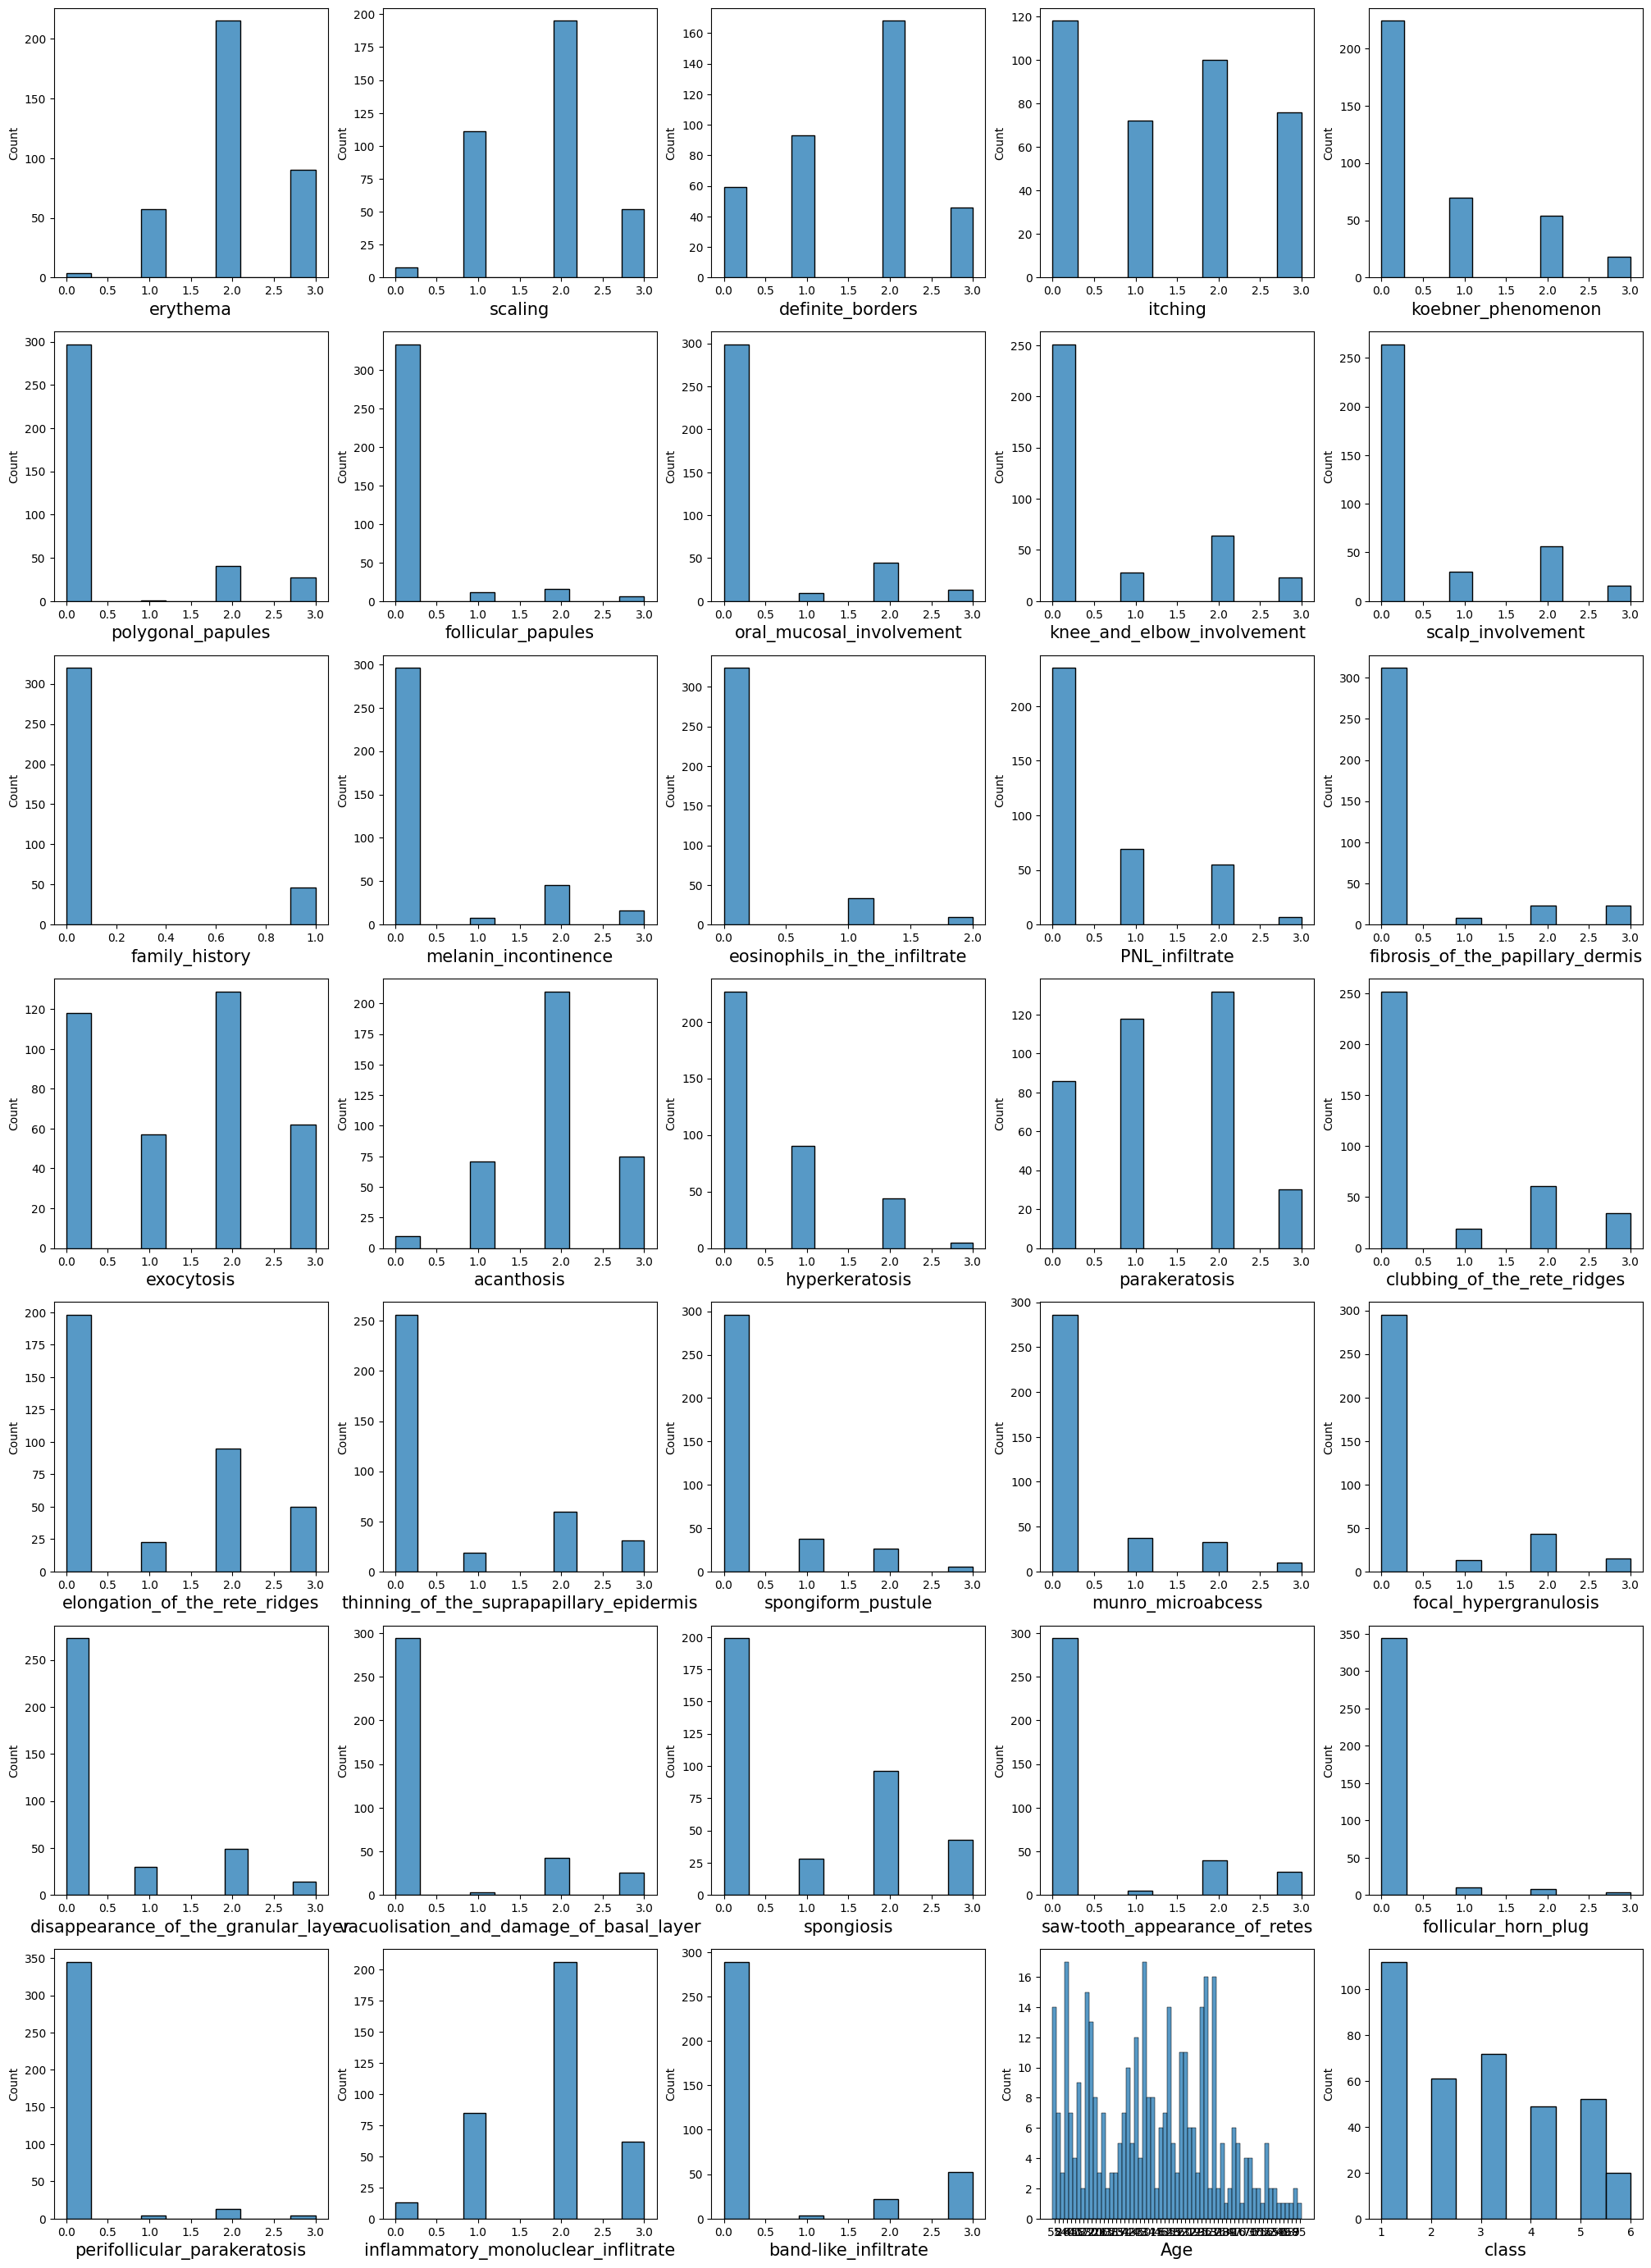

In [99]:
plt.figure(figsize=(25,35), facecolor='white')# defining  canvas size
plotnumber = 1

for column in data.columns: # iteration of columns / acessing the columns from  dataset
    if plotnumber<=35 :     # as there are 35 columns in the data
        ax = plt.subplot(7,5,plotnumber)
        sns.histplot(x=data[column])
        plt.xlabel(column,fontsize=15) #assigning name to x-axis and font size is 15

    plotnumber+=1 # increment of plotnumber
plt.show()

There are 34 featueres are present to predict the target class.
But None of them were normally distributed
Most of the features are looks like they are highly correlated to each other
example: perifollicular_parakeratosis is highly correlated to follicular_horn_plug
in our target variable 1 disease is most often occuring in the patients and 6 is least
koebner_phenomenon,PNL_infiltrate,hyperkeratosis, spongiform_pustule and munro_microabcess these features are positively skewed

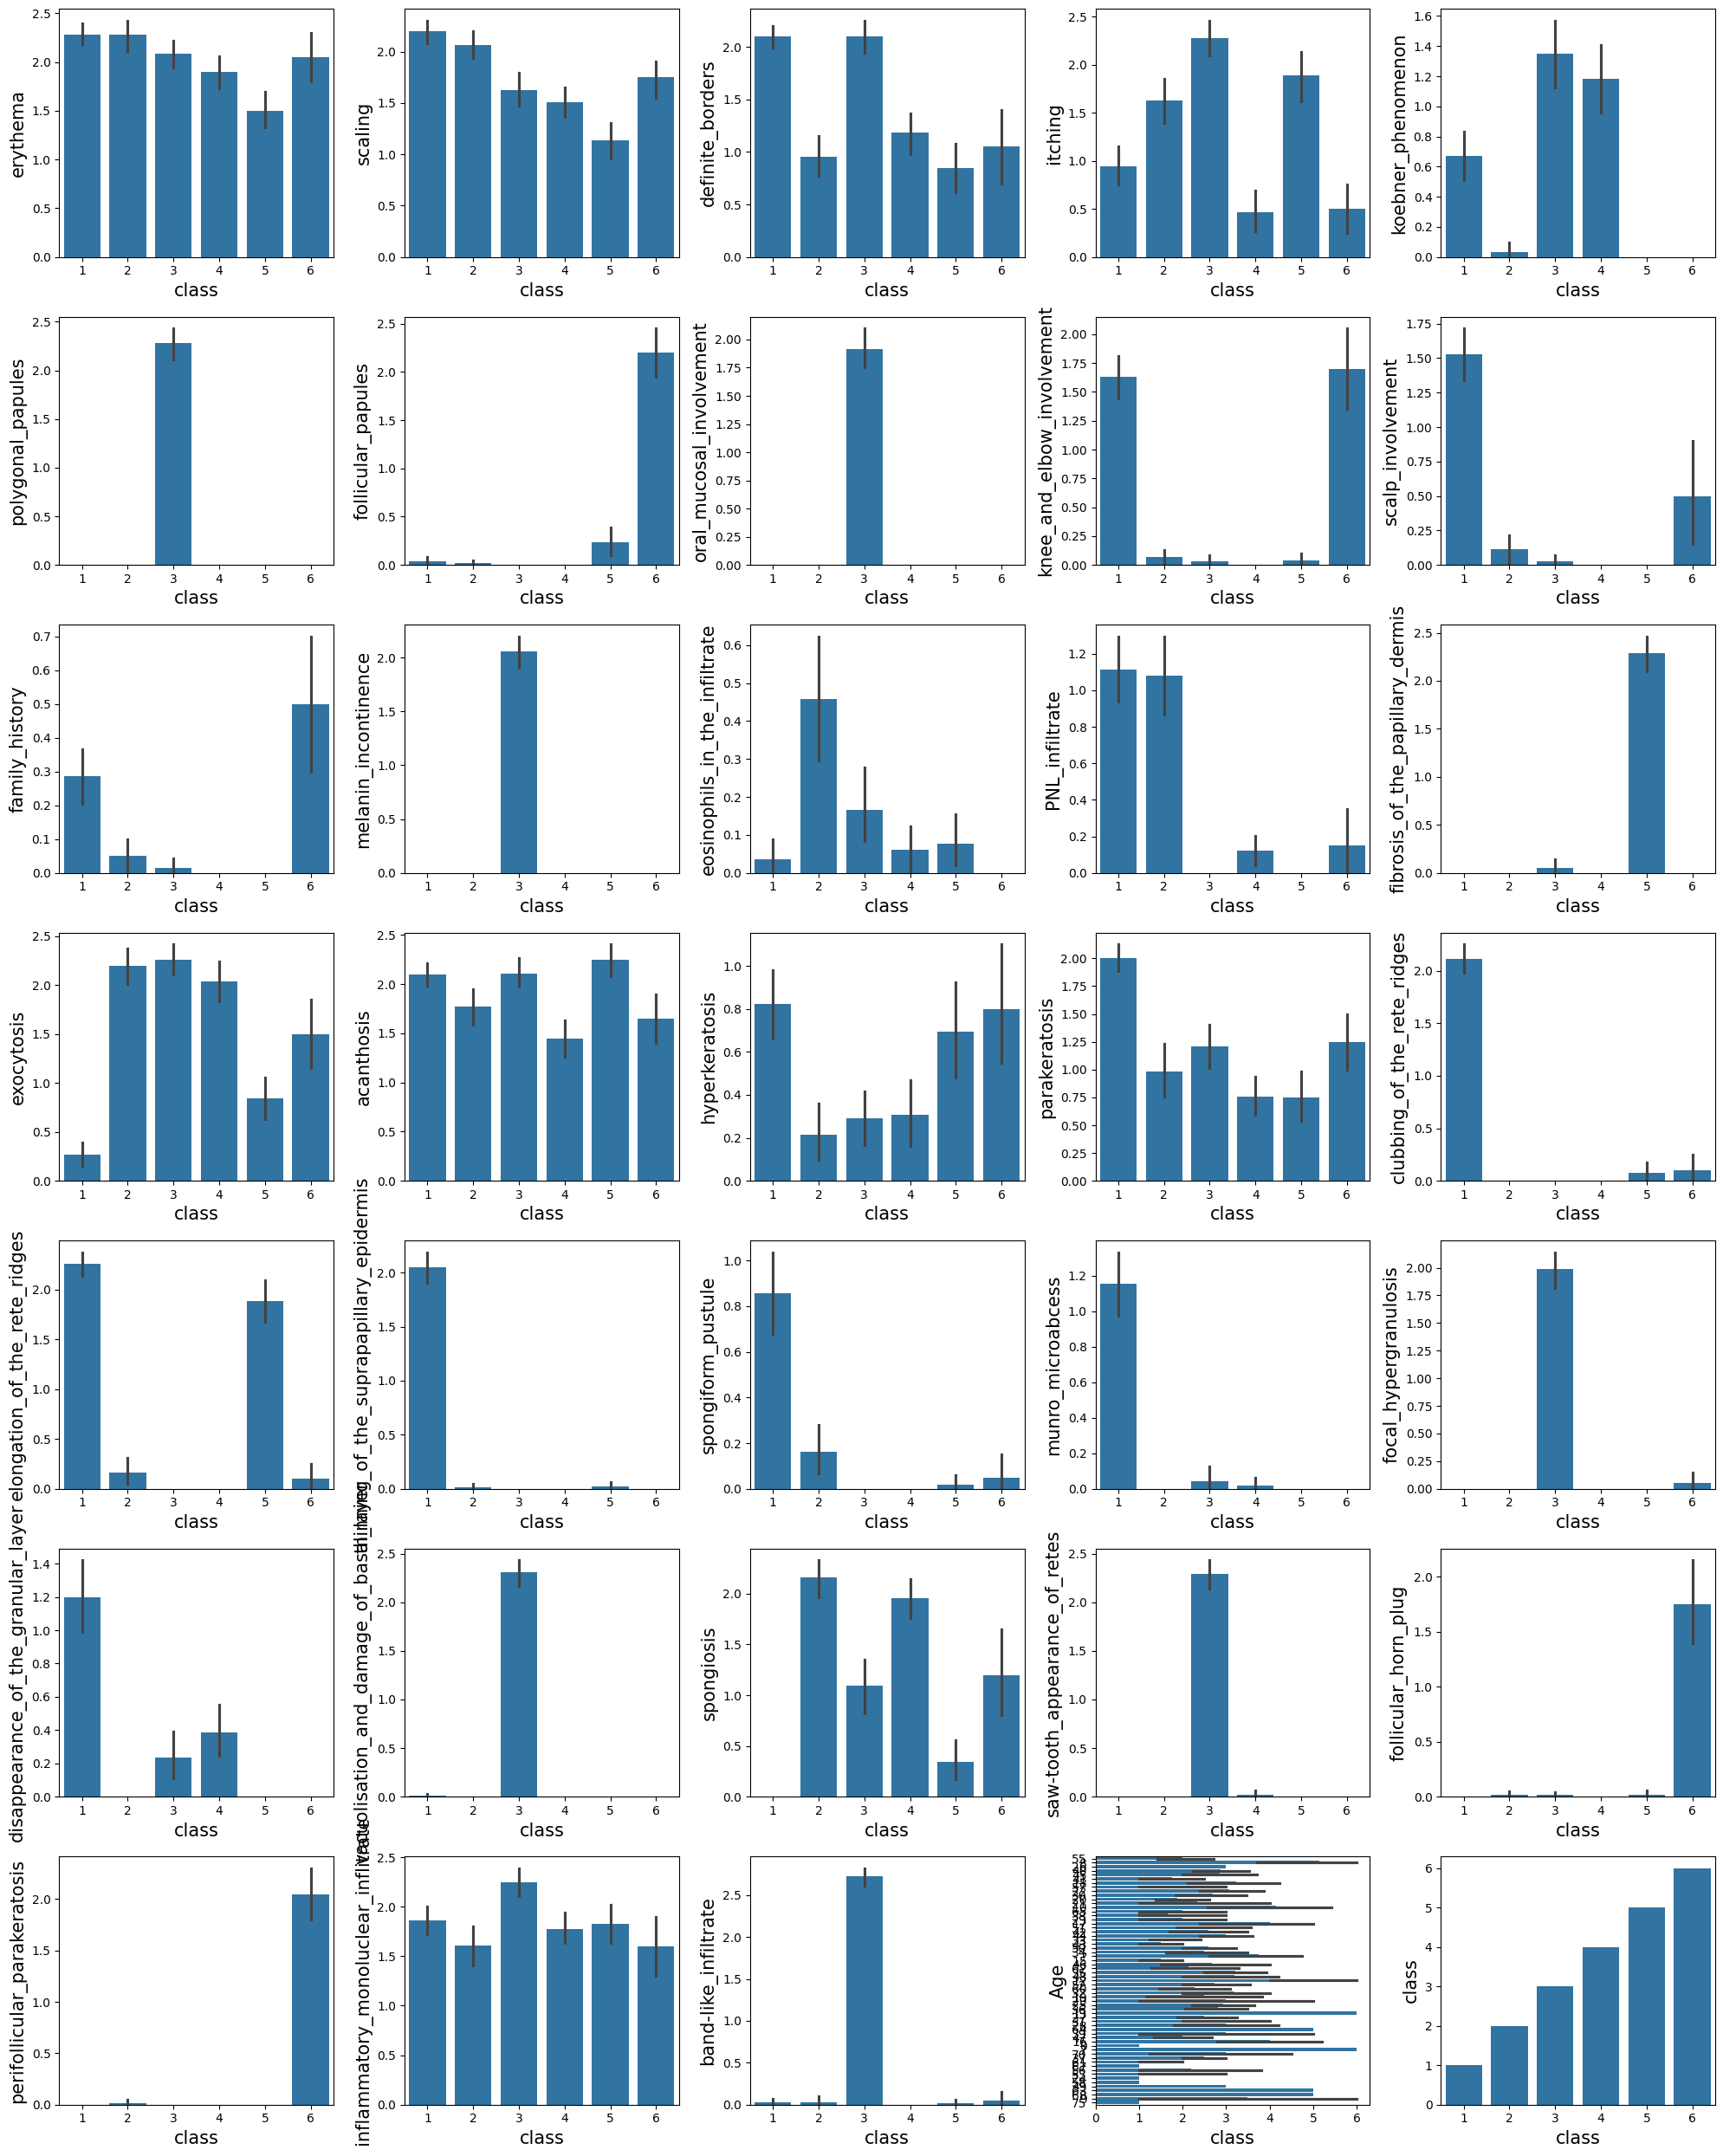

In [100]:
#Bivariant Analysis

plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1

for column in data:
    ax = plt.subplot(7,5,plotnumber)
    sns.barplot(x=data['class'],y=data[column])
    plt.ylabel(column,fontsize=15)
    plt.xlabel('class',fontsize=15)
    plt.xticks(fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

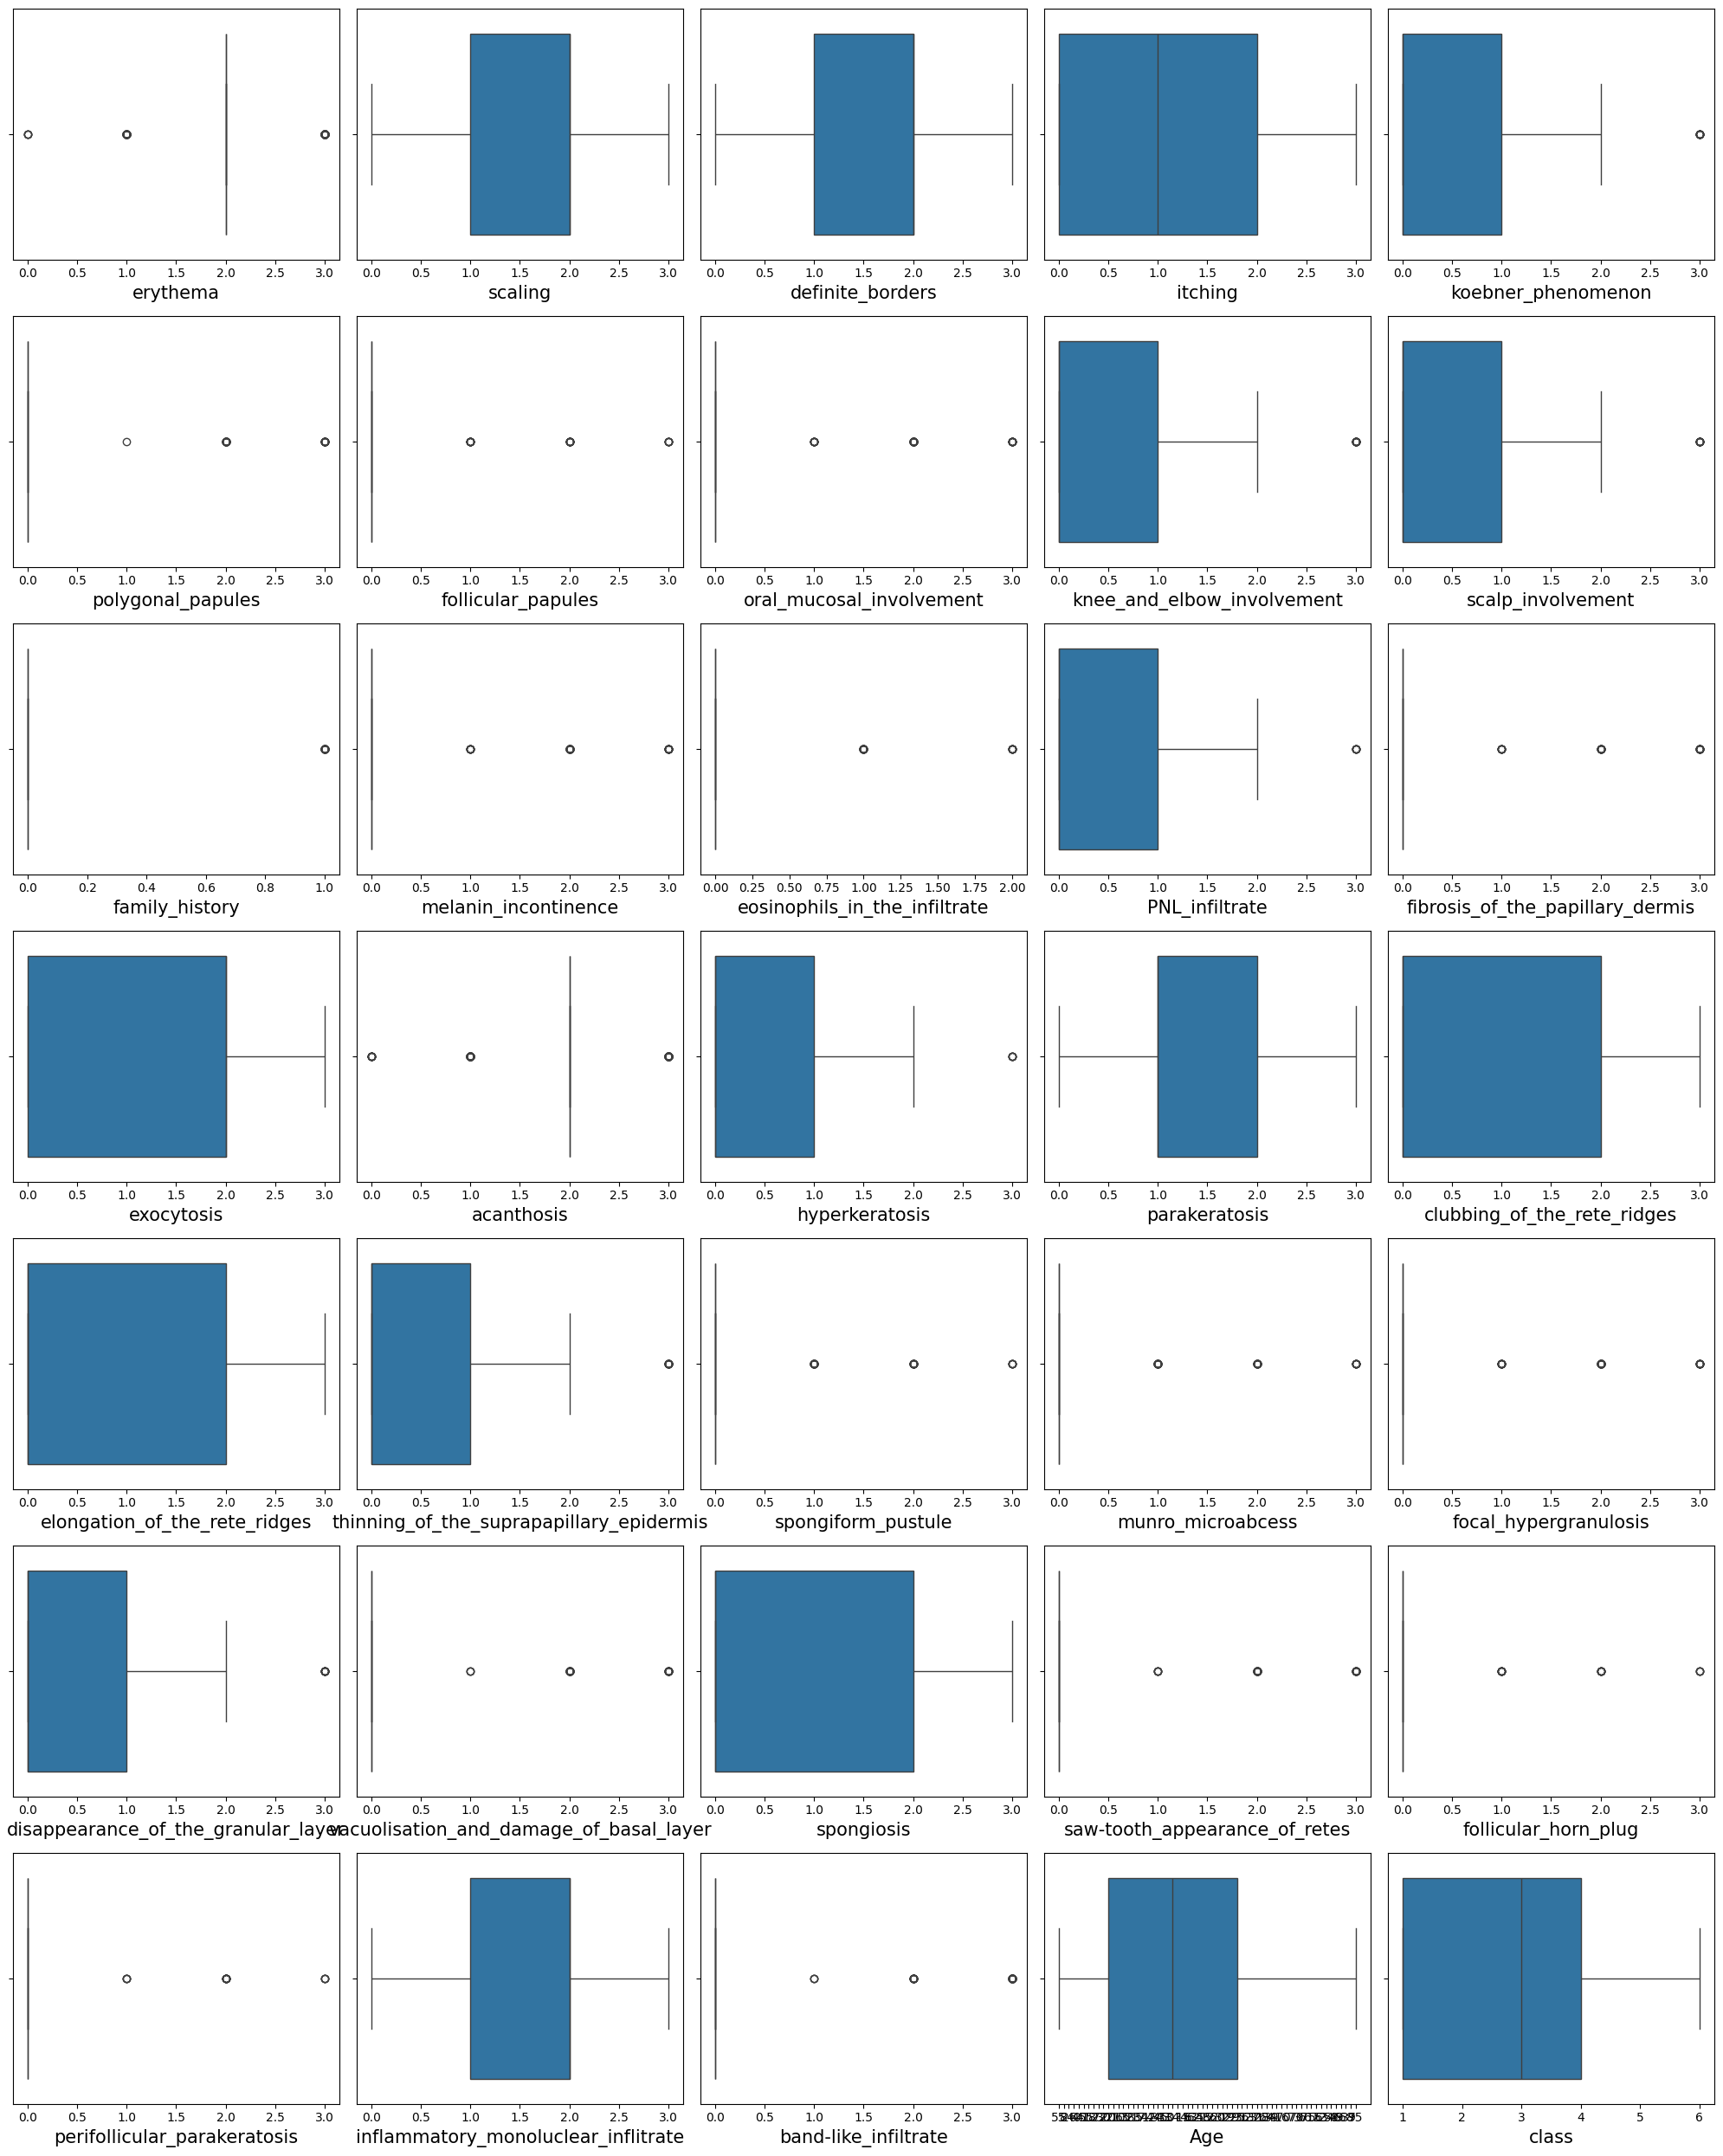

In [101]:
#Box plot to check outlier
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1

for column in data:
    ax = plt.subplot(7,5,plotnumber)
    sns.boxplot(data[column],orient='h')
    plt.xlabel(column,fontsize=15)

    plotnumber+=1
plt.tight_layout()
plt.show()

Insights from Boxplot

Since from all of the features we have values ranges from 0 to 3 except target  variable, so there are very less chances to being an outlier.
Here we can notice no one feature's values lies above 3 and below 0 except target variable.

In [102]:
#Checking null values
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

No Nulls values are present in data

In [103]:
data.Age.unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [104]:
data.loc[data['Age']== '?']

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
33          2        2                 1        0                   0   
34          2        1                 0        0                   2   
35          2        2                 1        2                   0   
36          2        1                 2        3                   2   
262         2        1                 0        2                   0   
263         1        1                 1        3                   0   
264         1        1                 0        2                   0   
265         1        1                 0        3                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
33                   0                   0                         0   
34                   0                   0                         0   
35                   0                   0                         0   
36                   3                   0                         2   
262                  0                   0                         0   
263                  0                   0                         0   
264                  0                   0                         0   
265                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
33                            1                  0  ...   
34                            0                  0  ...   
35                            0                  0  ...   
36                            0                  0  ...   
262                           0                  0  ...   
263                           0                  0  ...   
264                           1                  0  ...   
265                           0                  0  ...   

     disappearance_of_the_granular_layer  \
33                                     0   
34                                     0   
35                                     0   
36                                     0   
262                                    0   
263                                    0   
264                                    0   
265                                    0   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
33                                         0           0   
34                                         0           0   
35                                         0           0   
36                                         2           0   
262                                        0           2   
263                                        0           3   
264                                        0           2   
265                                        0           2   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
33                               0                     0   
34                               0                     0   
35                               0                     0   
36                               2                     0   
262                              0                     0   
263                              0                     0   
264                              0                     0   
265                              0                     0   

     perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
33                              0                                    0   
34                              0                                    0   
35                              0                                    0   
36                              0                                    0   
262                             0                                    3   
263                             0                                    2   
264                             0                                    3   
265                             0                                    3   

     band-like_infil

In [105]:
# replacing ? mark with nan value
data['Age'] = data['Age'].replace('?', np.nan)

In [106]:
# converting to float to calculate mean of age
data['Age'] = data['Age'].astype(float)

In [107]:
# Mean of Age
mean_age = data['Age'].mean()
# filling nan values with mean of Age
data['Age'].fillna(mean_age,inplace=True)


In [108]:
data.Age

0      55.0
1       8.0
2      26.0
3      40.0
4      45.0
       ... 
361    25.0
362    36.0
363    28.0
364    50.0
365    35.0
Name: Age, Length: 366, dtype: float64

**Feature Engineering**

<Axes: >

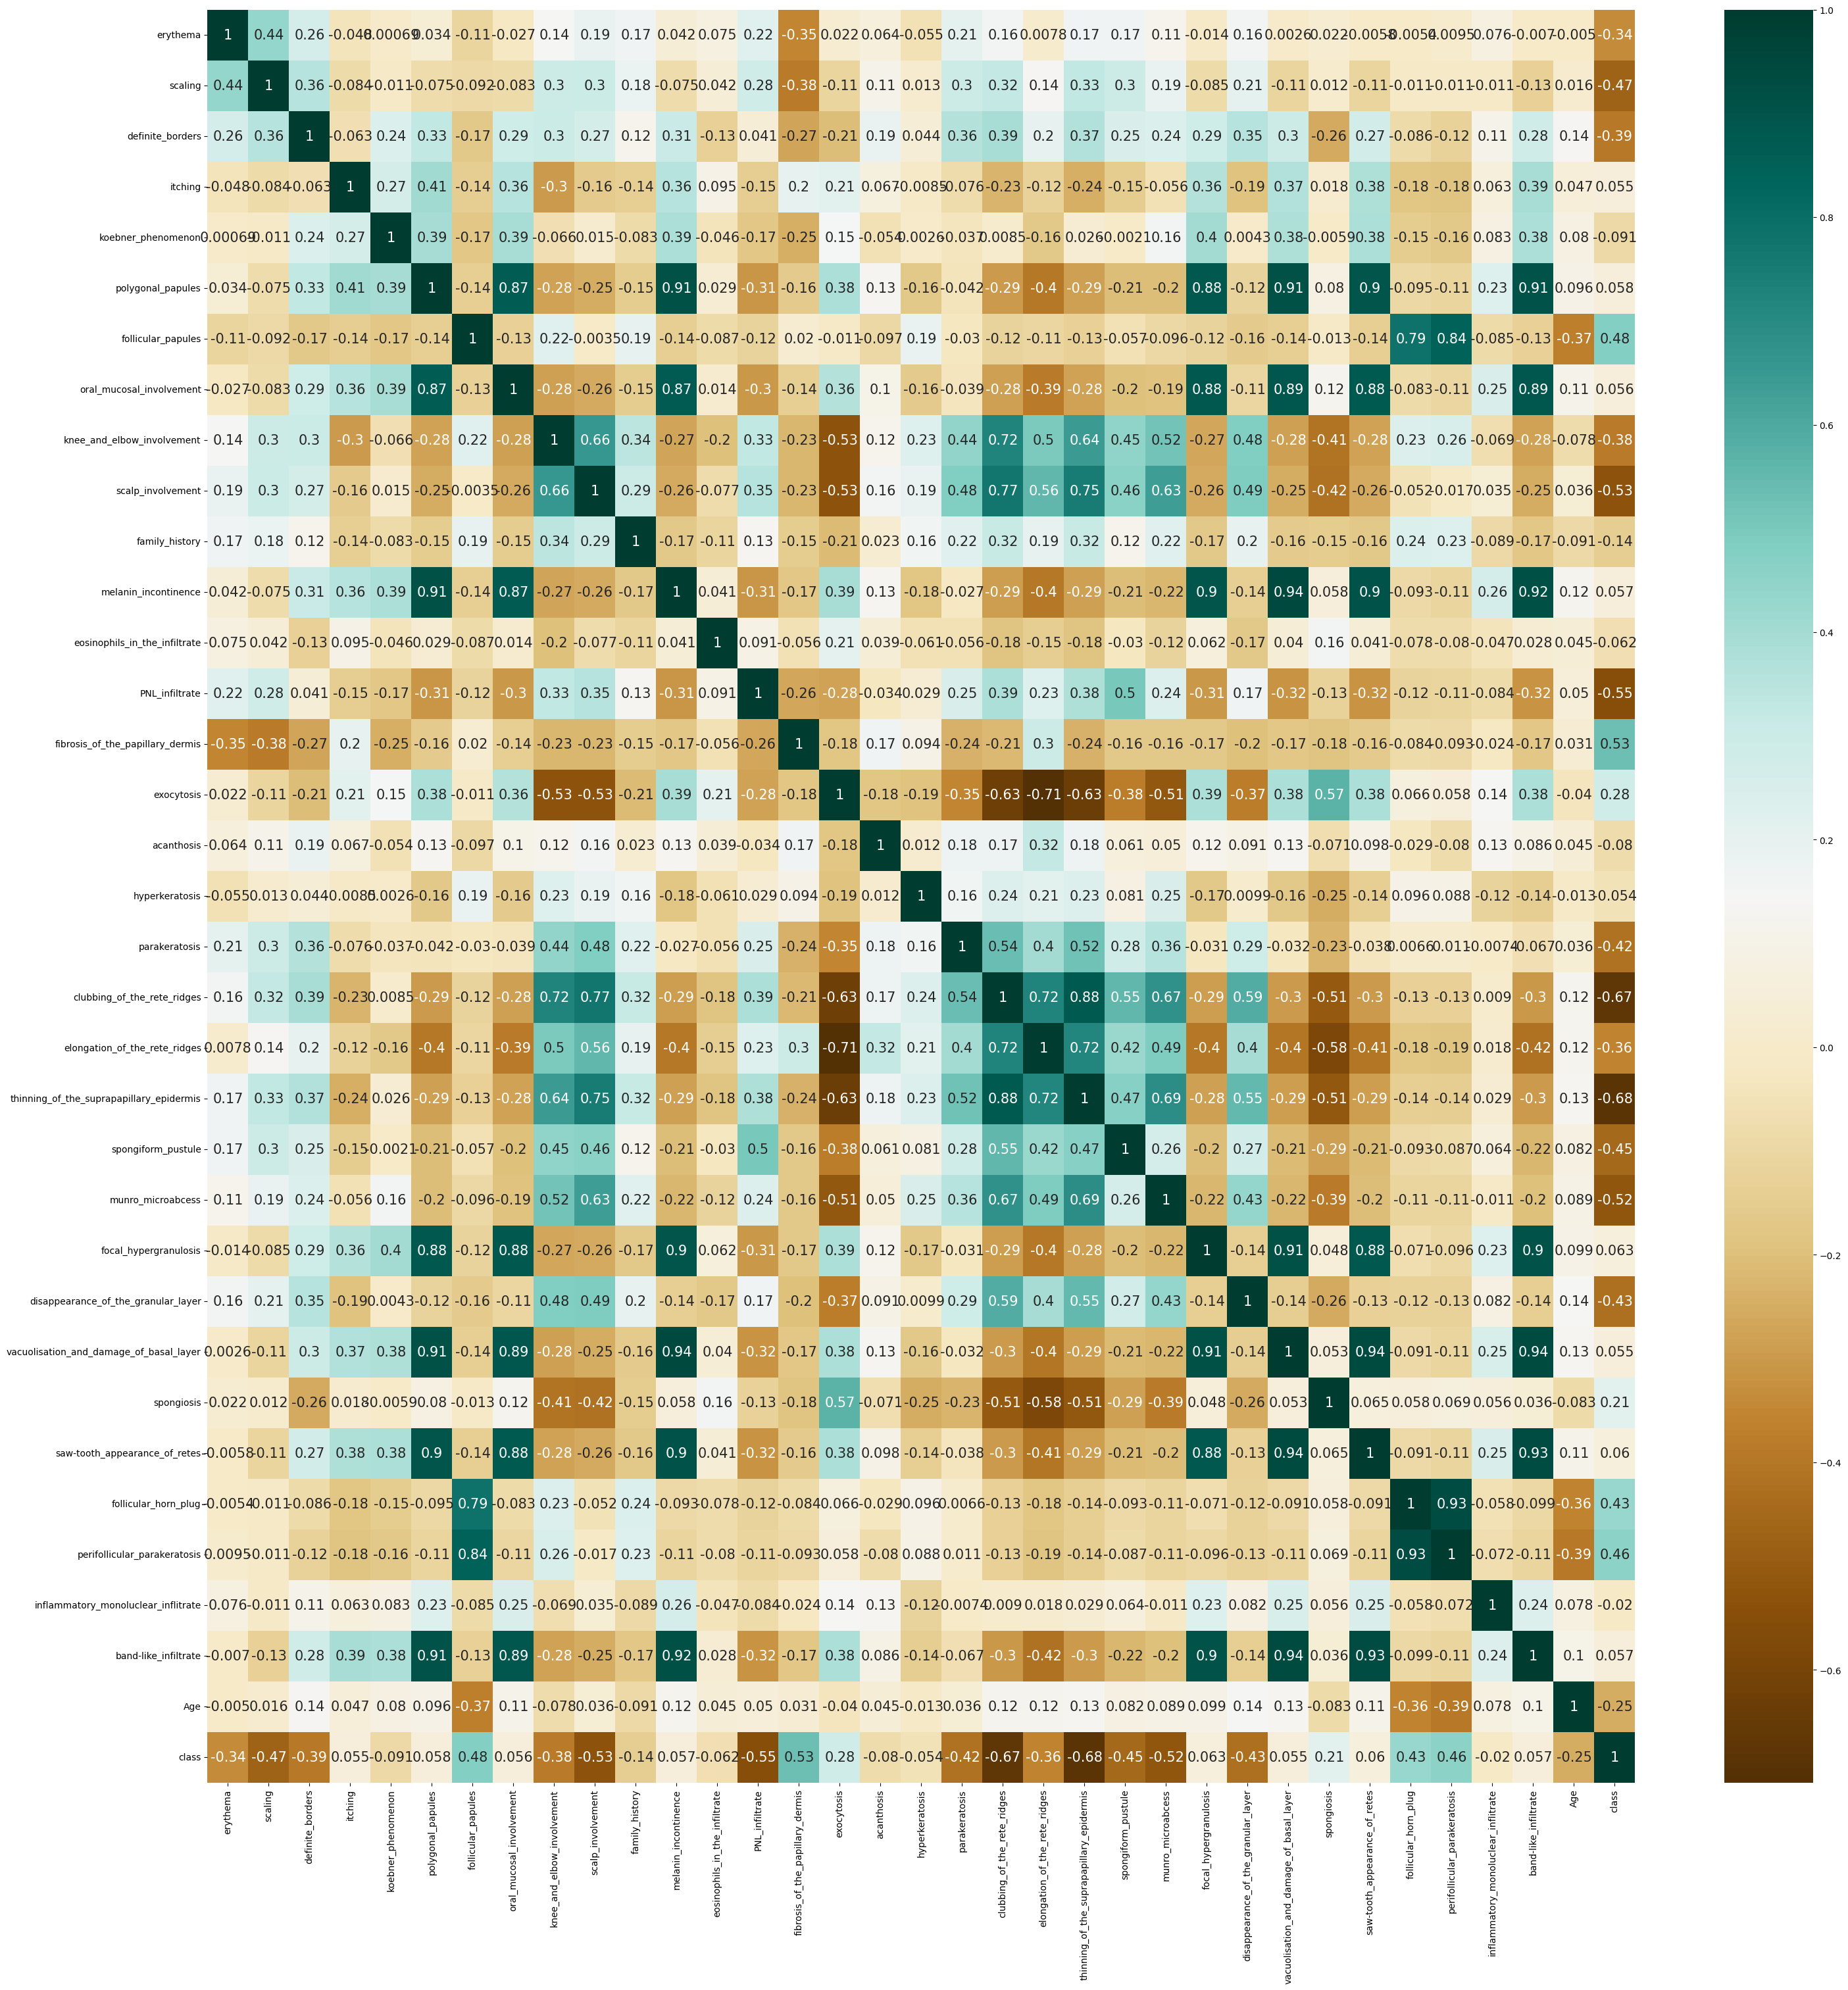

In [109]:
plt.figure(figsize=(35,35),facecolor='white')
sns.heatmap(data.corr(),annot=True,cmap = 'BrBG',annot_kws = {'size':15})

In [110]:
#chekcing the correlation
corr_matrix = data.corr()

corr_matrix

erythema   scaling  \
erythema                                  1.000000  0.435467   
scaling                                   0.435467  1.000000   
definite_borders                          0.260087  0.357987   
itching                                  -0.047623 -0.084197   
koebner_phenomenon                        0.000694 -0.010576   
polygonal_papules                         0.033571 -0.075035   
follicular_papules                       -0.109550 -0.092400   
oral_mucosal_involvement                 -0.026810 -0.082969   
knee_and_elbow_involvement                0.141008  0.298398   
scalp_involvement                         0.186684  0.301577   
family_history                            0.172059  0.181491   
melanin_incontinence                      0.042126 -0.074856   
eosinophils_in_the_infiltrate             0.075228  0.042211   
PNL_infiltrate                            0.224095  0.282486   
fibrosis_of_the_papillary_dermis         -0.354595 -0.383585   
exocytosis                                0.021565 -0.110809   
acanthosis                                0.064165  0.108095   
hyperkeratosis                           -0.055432  0.013149   
parakeratosis                             0.210030  0.296752   
clubbing_of_the_rete_ridges               0.157558  0.320740   
elongation_of_the_rete_ridges             0.007819  0.139073   
thinning_of_the_suprapapillary_epidermis  0.167868  0.330343   
spongiform_pustule                        0.169773  0.297783   
munro_microabcess                         0.113464  0.186366   
focal_hypergranulosis                    -0.013761 -0.085021   
disappearance_of_the_granular_layer       0.159100  0.211484   
vacuolisation_and_damage_of_basal_layer   0.002559 -0.109523   
spongiosis                                0.022468  0.012151   
saw-tooth_appearance_of_retes            -0.005779 -0.114467   
follicular_horn_plug                     -0.005450 -0.010518   
perifollicular_parakeratosis              0.009539 -0.011135   
inflammatory_monoluclear_inflitrate       0.075758 -0.010977   
band-like_infiltrate                     -0.006955 -0.132079   
Age                                      -0.004974  0.015830   
class                                    -0.335537 -0.468688   

                                          definite_borders   itching  \
erythema                                          0.260087 -0.047623   
scaling                                           0.357987 -0.084197   
definite_borders                                  1.000000 -0.062564   
itching                                          -0.062564  1.000000   
koebner_phenomenon                                0.241342  0.267878   
polygonal_papules                                 0.327754  0.409696   
follicular_papules                               -0.166662 -0.144825   
oral_mucosal_involvement                          0.286684  0.359163   
knee_and_elbow_involvement                        0.302309 -0.299645   
scalp_involvement                                 0.268862 -0.155639   
family_history                                    0.115844 -0.136615   
melanin_incontinence                              0.311398  0.359207   
eosinophils_in_the_infiltrate                    -0.132021  0.095434   
PNL_infiltrate                                    0.041330 -0.145288   
fibrosis_of_the_papillary_dermis                 -0.274414  0.203032   
exocytosis                                       -0.205391  0.214822   
acanthosis                                        0.189761  0.067080   
hyperkeratosis                                    0.043894 -0.008460   
parakeratosis                                     0.361213 -0.075568   
clubbing_of_the_rete_ridges                       0.387205 -0.232224   
elongation_of_the_rete_ridges                     0.201702 -0.124058   
thinning_of_the_suprapapillary_epidermis          0.369266 -0.244052   
spongiform_pustule                                0.246204 -0.152689   
munro_mic

In [111]:
# Dropping highly correlated columns (0.05)
data.drop(['polygonal_papules','oral_mucosal_involvement','melanin_incontinence','focal_hypergranulosis',
          'vacuolisation_and_damage_of_basal_layer','saw-tooth_appearance_of_retes',
          'follicular_horn_plug','perifollicular_parakeratosis','band-like_infiltrate'],axis=1,inplace=True)

<Axes: >

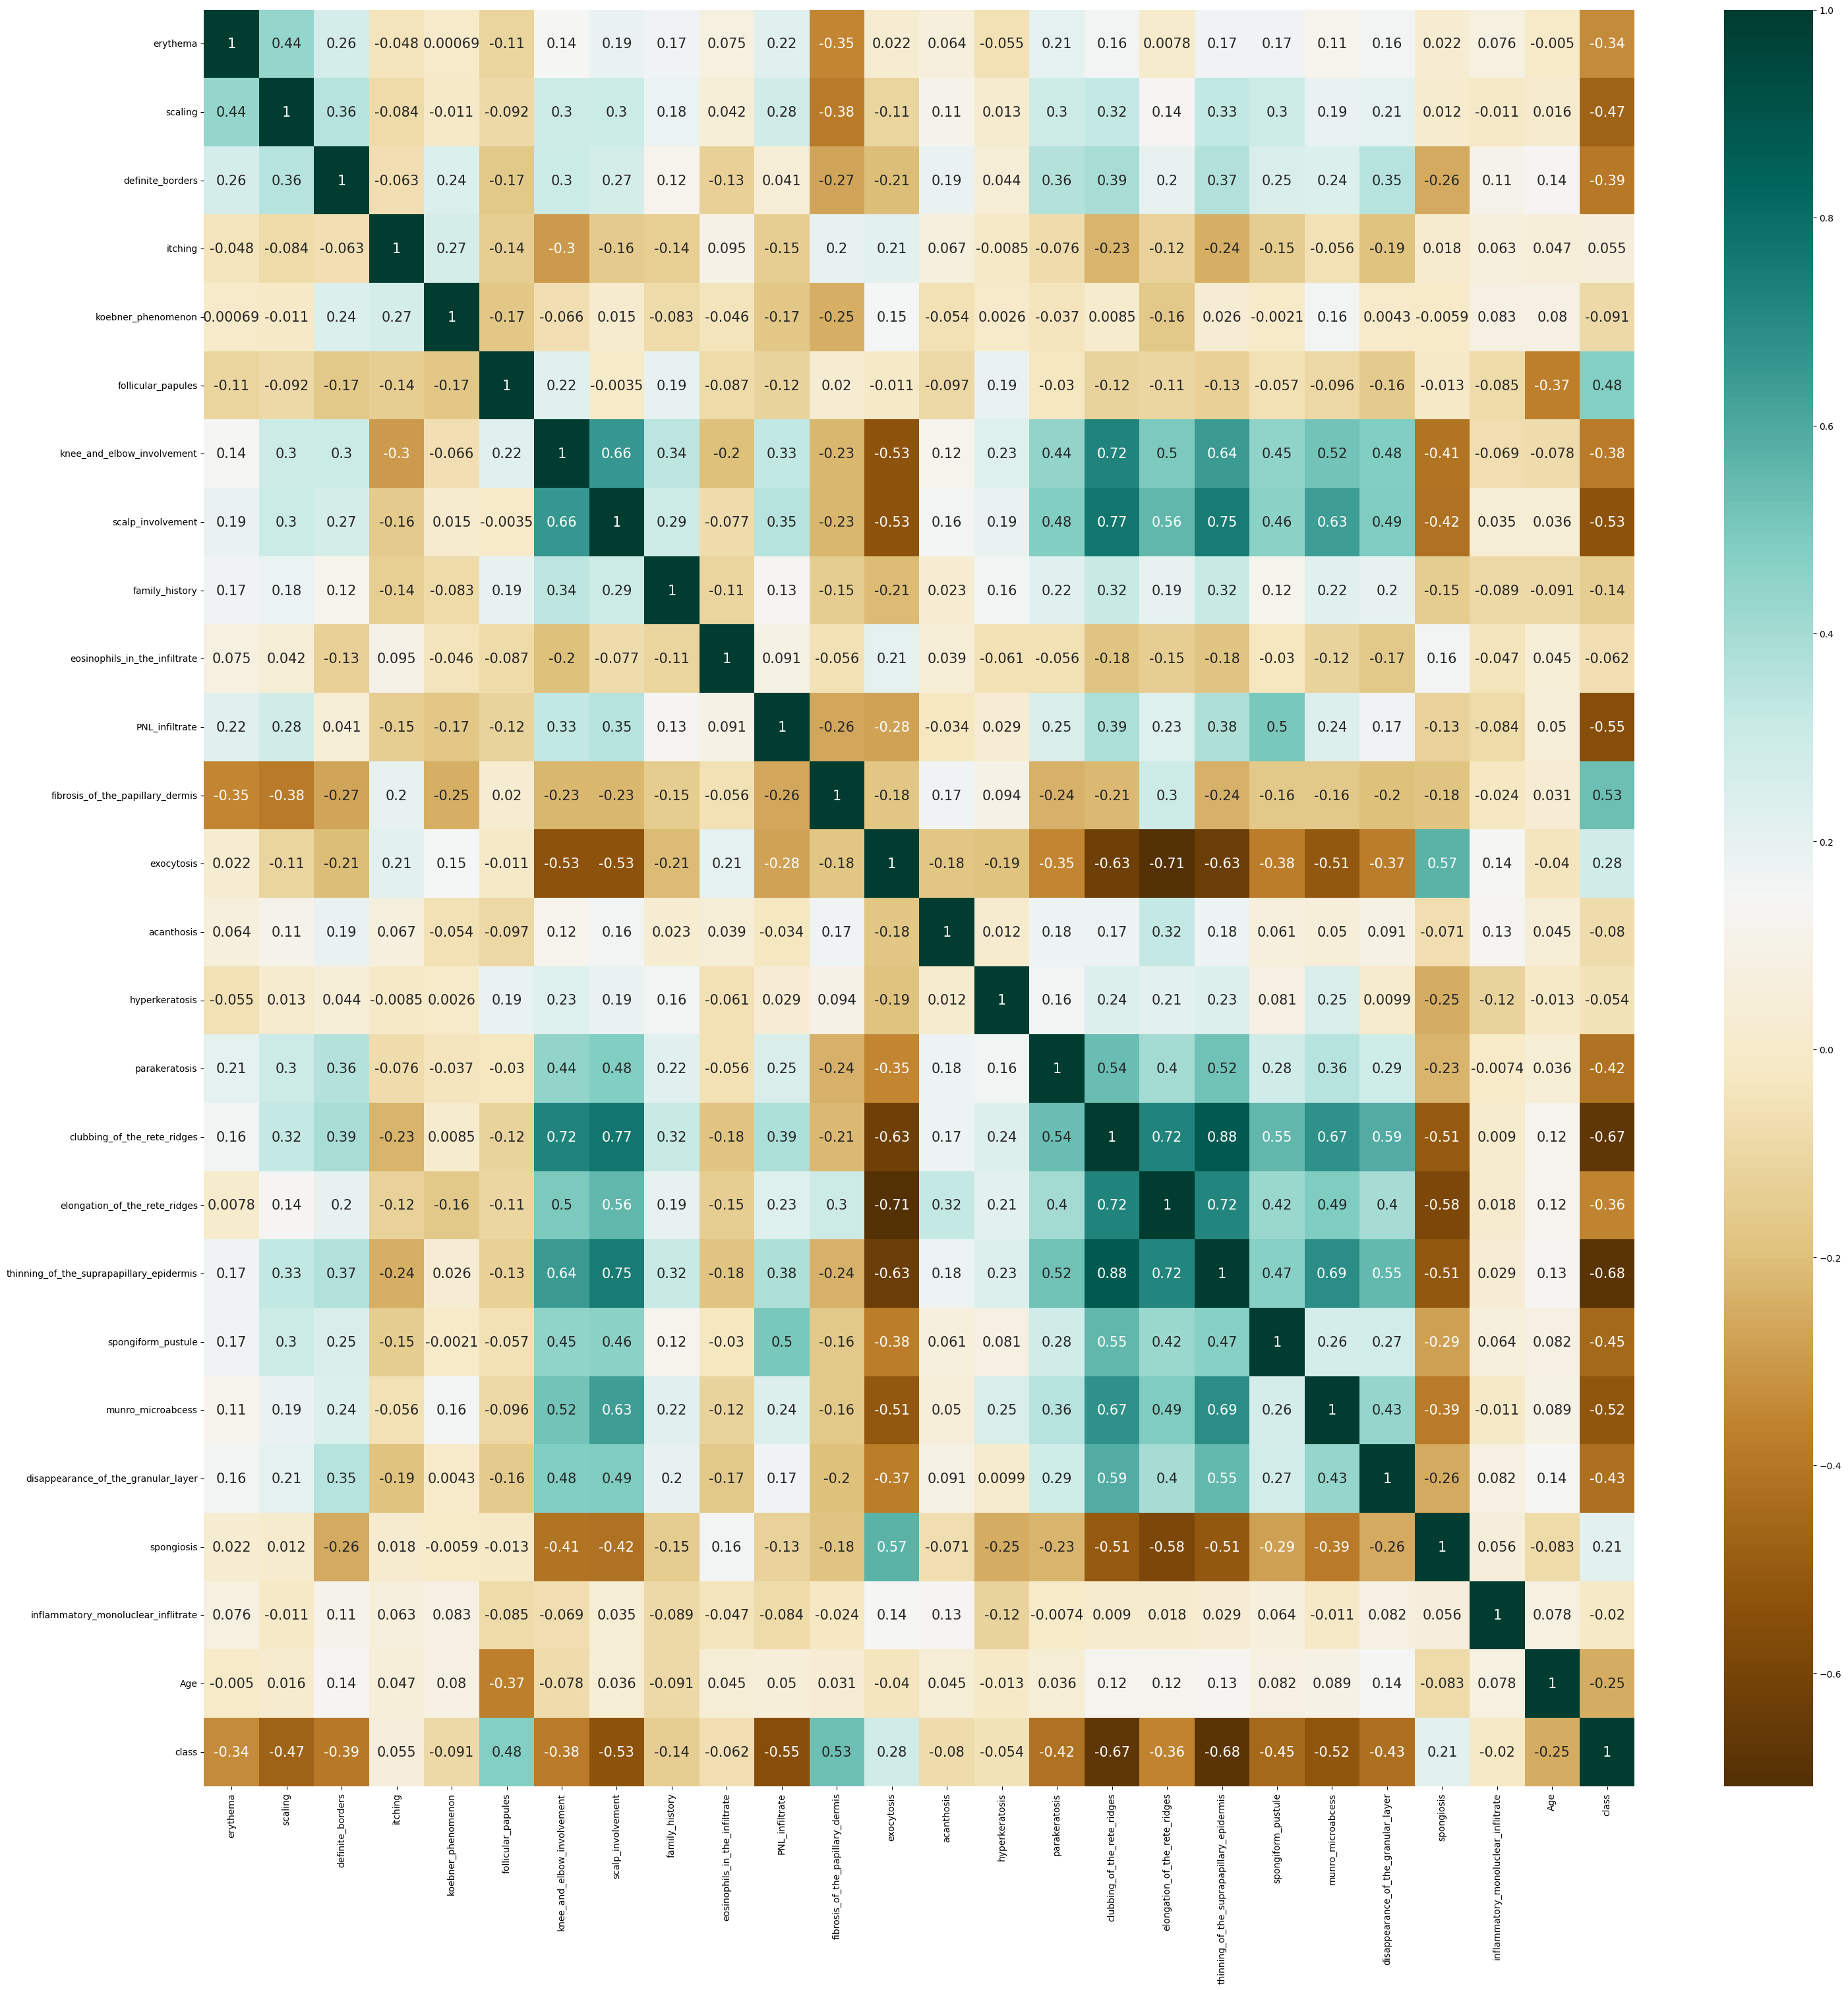

In [112]:
#Data after dropping highly correlated feature

plt.figure(figsize=(35,35),facecolor='white')
sns.heatmap(data.corr(),annot=True,cmap = 'BrBG',annot_kws = {'size':15})

In [113]:
data.shape

(366, 26)

In [114]:
#Model Creation
x = data.iloc[:,:25]
y = data.iloc[:,-1]

In [115]:
x

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     follicular_papules  knee_and_elbow_involvement  scalp_involvement  \
0                     0                           1                  0   
1                     0                           1                  1   
2                     0                           0                  0   
3                     0                           3                  2   
4                     0                           0                  0   
..                  ...                         ...                ...   
361                   0                           0                  0   
362                   0                           0                  0   
363                   0                           0                  0   
364                   0                           0                  0   
365                   0                           3                  3   

     family_history  eosinophils_in_the_infiltrate  ...  parakeratosis  \
0                 0                              0  ...              0   
1                 1                              0  ...              2   
2                 0                              0  ...              2   
3                 0                              0  ...              3   
4                 0                              0  ...              0   
..              ...                            ...  ...            ...   
361               0                              0  ...              0   
362               0                              0  ...              0   
363               0                              2  ...              0   
364               0                              0  ...              0   
365               0                              0  ...              2   

     clubbing_of_the_rete_ridges  elongation_of_the_rete_ridges  \
0                              0                              0   
1                              2                              2   
2                              0                              0   
3                              2                              2   
4                              0                              0   
..                           ...                            ...   
361                            0                              0   
362                            0                              0   
363                            0                              0   
364                            0                              0   
365                            3                              2   

     thinning_of_the_suprapapillary_epidermis  spongiform_pustule  \
0                                           0                   0   
1                                           2                   2   
2                                           0                   0   
3                                           2                   2   
4                                           0                   0   
..                                        ...                 ...   
361                                         0                 

In [116]:
y

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 366, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [118]:
x_test

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
193         2        2                 2        0                   0   
33          2        2                 1        0                   0   
15          1        1                 0        1                   3   
310         3        2                 2        0                   0   
57          2        1                 1        3                   0   
..        ...      ...               ...      ...                 ...   
82          2        1                 1        2                   0   
94          2        1                 1        3                   2   
192         3        2                 2        2                   0   
307         2        1                 2        1                   1   
211         2        3                 2        0                   0   

     follicular_papules  knee_and_elbow_involvement  scalp_involvement  \
193                   0                           2                  2   
33                    0                           1                  0   
15                    0                           0                  0   
310                   0                           0                  1   
57                    0                           0                  0   
..                  ...                         ...                ...   
82                    0                           0                  0   
94                    0                           0                  0   
192                   0                           0                  0   
307                   0                           0                  0   
211                   0                           3                  2   

     family_history  eosinophils_in_the_infiltrate  ...  parakeratosis  \
193               1                              0  ...              3   
33                1                              0  ...              2   
15                0                              0  ...              1   
310               1                              0  ...              2   
57                0                              0  ...              1   
..              ...                            ...  ...            ...   
82                0                              0  ...              2   
94                0                              0  ...              1   
192               0                              0  ...              3   
307               0                              0  ...              1   
211               0                              0  ...              2   

     clubbing_of_the_rete_ridges  elongation_of_the_rete_ridges  \
193                            3                              2   
33                             2                              1   
15                             0                              0   
310                            2                              3   
57                             0                              0   
..                           ...                            ...   
82                             0                              0   
94                             0                              0   
192                            0                              0   
307                            0                              0   
211                            3                              3   

     thinning_of_the_suprapapillary_epidermis  spongiform_pustule  \
193                                         2                   2   
33                                          2                   0   
15                                          0                   0   
310                                         2                   0   
57                                          0                   0   
..                                        ...                 ...   
82                                          0                 

In [119]:
y_test

193    1
33     1
15     4
310    1
57     3
      ..
82     2
94     3
192    3
307    4
211    1
Name: class, Length: 74, dtype: int64

**Logistic Regression**

In [120]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr')

In [121]:
model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [122]:
y_pred = model.predict(x_test)

In [123]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
# Testing Score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       0.82      1.00      0.90         9
           3       0.85      0.85      0.85        13
           4       0.71      0.62      0.67         8
           5       1.00      1.00      1.00        10
           6       0.67      0.67      0.67         3

    accuracy                           0.91        74
   macro avg       0.84      0.85      0.84        74
weighted avg       0.91      0.91      0.90        74



In [124]:
# predicting for training data
y_pred_train = model.predict(x_train)
# training score
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        81
           2       0.98      0.98      0.98        52
           3       0.97      0.97      0.97        59
           4       0.95      0.95      0.95        41
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        17

    accuracy                           0.98       292
   macro avg       0.98      0.98      0.98       292
weighted avg       0.98      0.98      0.98       292



In [125]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9054054054054054


In [126]:
# f1_score
f1_logistic = f1_score(y_test,y_pred,average='weighted')
f1_logistic

0.9043937380002954

Decision Tree Classifier

In [127]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)


DecisionTreeClassifier()

In [128]:
y_pred_dtc = dtc.predict(x_test)
y_pred_dtctrain = dtc.predict(x_train)

In [129]:
# Testing score
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       1.00      0.89      0.94         9
           3       0.83      0.77      0.80        13
           4       0.60      0.75      0.67         8
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00         3

    accuracy                           0.91        74
   macro avg       0.90      0.88      0.89        74
weighted avg       0.91      0.91      0.91        74



In [130]:
# training score
print(classification_report(y_train,y_pred_dtctrain))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        17

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



In [131]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [132]:
#accuracy score
print(accuracy_score(y_test,y_pred_dtc))

0.9054054054054054


In [133]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dtc)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[31  0  0  0  0  0]
 [ 0  8  0  1  0  0]
 [ 0  0 10  3  0  0]
 [ 0  0  2  6  0  0]
 [ 1  0  0  0  9  0]
 [ 0  0  0  0  0  3]]


In [134]:
# f1_score
f1_dt = f1_score(y_test,y_pred_dtc,average='weighted')
f1_dt

0.907912733609328

Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [136]:
y_pred_rfc = rfc.predict(x_test)
y_pred_rfctrain = rfc.predict(x_train)

In [137]:
# Testing score
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       0.92      0.85      0.88        13
           4       0.75      0.75      0.75         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.95        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.95      0.95      0.95        74



In [138]:
print(accuracy_score(y_test,y_pred_rfc))

0.9459459459459459


In [139]:
# training score
print(classification_report(y_train,y_pred_rfctrain))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        17

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



In [140]:
f1_rf = f1_score(y_test,y_pred_rfc,average='weighted')
f1_rf

0.9454907539118065


Support Vector Classifier

In [141]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)


SVC()

In [142]:
y_pred_svc = svc.predict(x_test)
y_pred_svctrain = svc.predict(x_train)

In [143]:
# Testing score
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           1       0.93      0.90      0.92        31
           2       0.44      0.44      0.44         9
           3       0.31      0.77      0.44        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        10
           6       0.33      0.33      0.33         3

    accuracy                           0.58        74
   macro avg       0.34      0.41      0.36        74
weighted avg       0.51      0.58      0.53        74



In [144]:
accuracy_score = print(accuracy_score(y_test,y_pred_svc))

0.581081081081081


In [145]:
# training score
print(classification_report(y_train,y_pred_svctrain))

              precision    recall  f1-score   support

           1       0.97      0.96      0.97        81
           2       0.32      0.31      0.31        52
           3       0.41      0.92      0.57        59
           4       0.00      0.00      0.00        41
           5       1.00      0.17      0.29        42
           6       0.71      1.00      0.83        17

    accuracy                           0.59       292
   macro avg       0.57      0.56      0.49       292
weighted avg       0.60      0.59      0.53       292



In [146]:
# f1_score
f1_svm = f1_score(y_test,y_pred_svc,average='weighted')
f1_svm

0.5302269482597352

Naive Bayes

In [147]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train,y_train)

MultinomialNB()

In [168]:
y_pred_NB = NB.predict(x_test)
y_pred_NBtrain = NB.predict(x_train)

In [174]:
# Testing score
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       0.85      0.85      0.85        13
           4       0.86      0.75      0.80         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.95        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.95      0.95      0.94        74



In [175]:
# training score
print(classification_report(y_train,y_pred_NBtrain))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        81
           2       0.94      0.88      0.91        52
           3       0.87      0.93      0.90        59
           4       0.85      0.80      0.83        41
           5       1.00      1.00      1.00        42
           6       0.94      1.00      0.97        17

    accuracy                           0.94       292
   macro avg       0.93      0.94      0.93       292
weighted avg       0.94      0.94      0.94       292



In [176]:
# f1_score
f1_naive = f1_score(y_test,y_pred_NB,average='weighted')
f1_naive

0.944950213371266

KNN

In [148]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i !=y_test))

In [149]:
error_rate

[0.21621621621621623,
 0.24324324324324326,
 0.2702702702702703,
 0.2702702702702703,
 0.24324324324324326,
 0.2702702702702703,
 0.25675675675675674,
 0.25675675675675674,
 0.2972972972972973,
 0.28378378378378377]

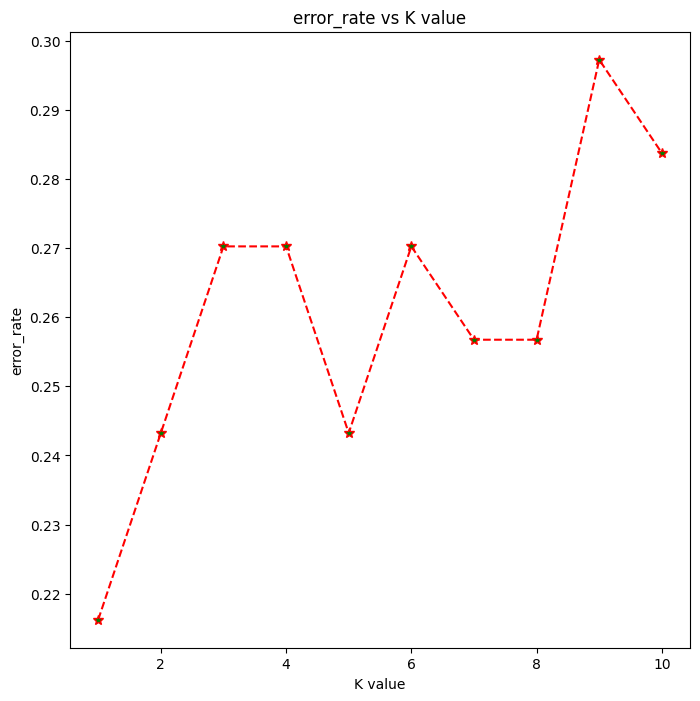

In [150]:
# plotting K value and error rate
plt.figure(figsize=(8,8))
plt.plot(range(1,11),error_rate,color='red',marker='*',markerfacecolor = 'green', linestyle = 'dashed',markersize=7)
plt.title('error_rate vs K value')
plt.xlabel('K value')
plt.ylabel('error_rate')
plt.show()

k value is 5

In [151]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train,y_train)
y_pred_knn = KNN.predict(x_test)
y_pred_ktrain = KNN.predict(x_train)

In [152]:
# Testing Score
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        31
           2       0.45      0.56      0.50         9
           3       0.62      0.77      0.69        13
           4       0.50      0.50      0.50         8
           5       1.00      0.80      0.89        10
           6       0.33      0.33      0.33         3

    accuracy                           0.76        74
   macro avg       0.65      0.64      0.64        74
weighted avg       0.79      0.76      0.77        74



In [153]:
# training score
print(classification_report(y_train,y_pred_ktrain))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99        81
           2       0.80      0.79      0.80        52
           3       0.86      0.85      0.85        59
           4       0.76      0.85      0.80        41
           5       1.00      0.86      0.92        42
           6       0.85      1.00      0.92        17

    accuracy                           0.89       292
   macro avg       0.88      0.89      0.88       292
weighted avg       0.89      0.89      0.89       292



In [154]:
# f1_score
f1_knn = f1_score(y_test,y_pred_knn,average='weighted')
f1_knn

0.7672720938355071

Hyperparameter for Decision Tree

In [155]:
from sklearn.model_selection import GridSearchCV
# Hyper parameters for decision tree
params = {
    'criterion':('ginni','entropy'),
    'splitter':('best','random'),
    'max_depth':(list(range(1,20))),
    'min_samples_split':(list(range(1,20))),
    'min_samples_leaf':(list(range(1,20)))
}

dtc_tree = DecisionTreeClassifier(random_state=23)
dtc_tree_cv = GridSearchCV(dtc_tree,params,verbose=2,n_jobs=-1,cv=5,scoring='accuracy')

dtc_tree_cv.fit(x_train,y_train) # Training the data on GridSearchCV
best_parameters = dtc_tree_cv.best_params_ # it will give us best parameters
# Printing the best parameters for further predictions
print('best_parameters:',best_parameters)

Fitting 5 folds for each of 27436 candidates, totalling 137180 fits
best_parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}


In [156]:
dtclassifier = DecisionTreeClassifier(criterion= 'entropy', max_depth= 9, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random',random_state=42)

In [157]:
dtclassifier.fit(x_train,y_train)
y_pred_dt = dtclassifier.predict(x_test)
y_pred_dttrain = dtclassifier.predict(x_train)

In [158]:
# Testing score
print(classification_report(y_test,y_pred_dt))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.82      1.00      0.90         9
           3       0.80      0.62      0.70        13
           4       0.70      0.88      0.78         8
           5       1.00      1.00      1.00        10
           6       1.00      0.67      0.80         3

    accuracy                           0.91        74
   macro avg       0.89      0.86      0.86        74
weighted avg       0.91      0.91      0.90        74



In [159]:
# training score
print(classification_report(y_train,y_pred_dttrain))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        81
           2       0.96      1.00      0.98        52
           3       0.98      1.00      0.99        59
           4       1.00      0.93      0.96        41
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        17

    accuracy                           0.99       292
   macro avg       0.99      0.99      0.99       292
weighted avg       0.99      0.99      0.99       292



In [160]:
# f1_score
f1_tuning_dt = f1_score(y_test,y_pred_dt,average='weighted')
f1_tuning_dt

0.9022391957174566

Hyperparameter tuning for Random Forest

In [161]:
from sklearn.model_selection import RandomizedSearchCV
# Hyper parameters for Random Forest
param_grid = {
    'n_estimators':[400,600,800,1000,1200,1400,1600,1800,2000,2200],
    'max_depth':(list(range(1,13))),
    'min_samples_split':(list(range(1,9))),
    'min_samples_leaf':(list(range(1,6))),
    'max_features':['auto','sqrt'],
    'bootstrap':[True,False]}

rfclassifier = RandomForestClassifier(random_state=43)
rf_tree_rcv = RandomizedSearchCV(rfclassifier,param_grid,verbose=2,n_jobs=-1,cv=3,n_iter=100,scoring='accuracy')

rf_tree_rcv.fit(x_train,y_train) # Training the data on GridSearchCV

best_parameters1 = rf_tree_rcv.best_params_
# printing best parameters for further prediction
print('best parameters:',best_parameters1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
best parameters: {'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}


In [169]:
rfclassifier = RandomForestClassifier(n_estimators= 2000, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 5, bootstrap= True,random_state=32)
rfclassifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=2000, random_state=32)

In [170]:
y_pred_rf = rfclassifier.predict(x_test)
y_pred_rftrain = rfclassifier.predict(x_train)

In [171]:
# Testing score
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       0.85      0.85      0.85        13
           4       0.71      0.62      0.67         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.93        74
   macro avg       0.91      0.91      0.91        74
weighted avg       0.93      0.93      0.93        74



In [172]:
# training score
print(classification_report(y_train,y_pred_rftrain))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        81
           2       0.91      0.98      0.94        52
           3       0.94      0.98      0.96        59
           4       1.00      0.83      0.91        41
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        17

    accuracy                           0.97       292
   macro avg       0.97      0.97      0.97       292
weighted avg       0.97      0.97      0.97       292



In [173]:
# f1_score
f1_tuning_rf = f1_score(y_test,y_pred_rf,average='weighted')
f1_tuning_rf

0.9305357989568516

Evalution Summary

In [177]:
my_dict = {'Model':['Logistic Regression','KNN','DecisionTree','RandomForest','SVM','Naive Bayes','HPT decision tree','HPT random forest'],
           'Acc_score for Test':[0.91,0.76,0.91,0.95,0.58,0.95,0.91,0.93],
           'Acc_score for Train':[0.98,0.89,1.00,1.00,0.59,0.94,0.99,0.97],
           'F1_score':[0.9054,0.7672,0.9054,0.9454,0.5302,0.9449,0.9022,0.9305]}

In [178]:
Scores = pd.DataFrame(my_dict)
Scores

Model  Acc_score for Test  Acc_score for Train  F1_score
0  Logistic Regression                0.91                 0.98    0.9054
1                  KNN                0.76                 0.89    0.7672
2         DecisionTree                0.91                 1.00    0.9054
3         RandomForest                0.95                 1.00    0.9454
4                  SVM                0.58                 0.59    0.5302
5          Naive Bayes                0.95                 0.94    0.9449
6    HPT decision tree                0.91                 0.99    0.9022
7    HPT random forest                0.93                 0.97    0.9305

Graphical Representation of Model Perfomance

In [179]:
l1=[0.90,0.76,0.53,0.90,0.94,0.90,0.94]
names=['LogisticReg','KNNClassifier','SVC','DecisionTreeClassifier','RandomforestClassifier','HyperparameterDT','HyperparameterRF','NaiveBayes']

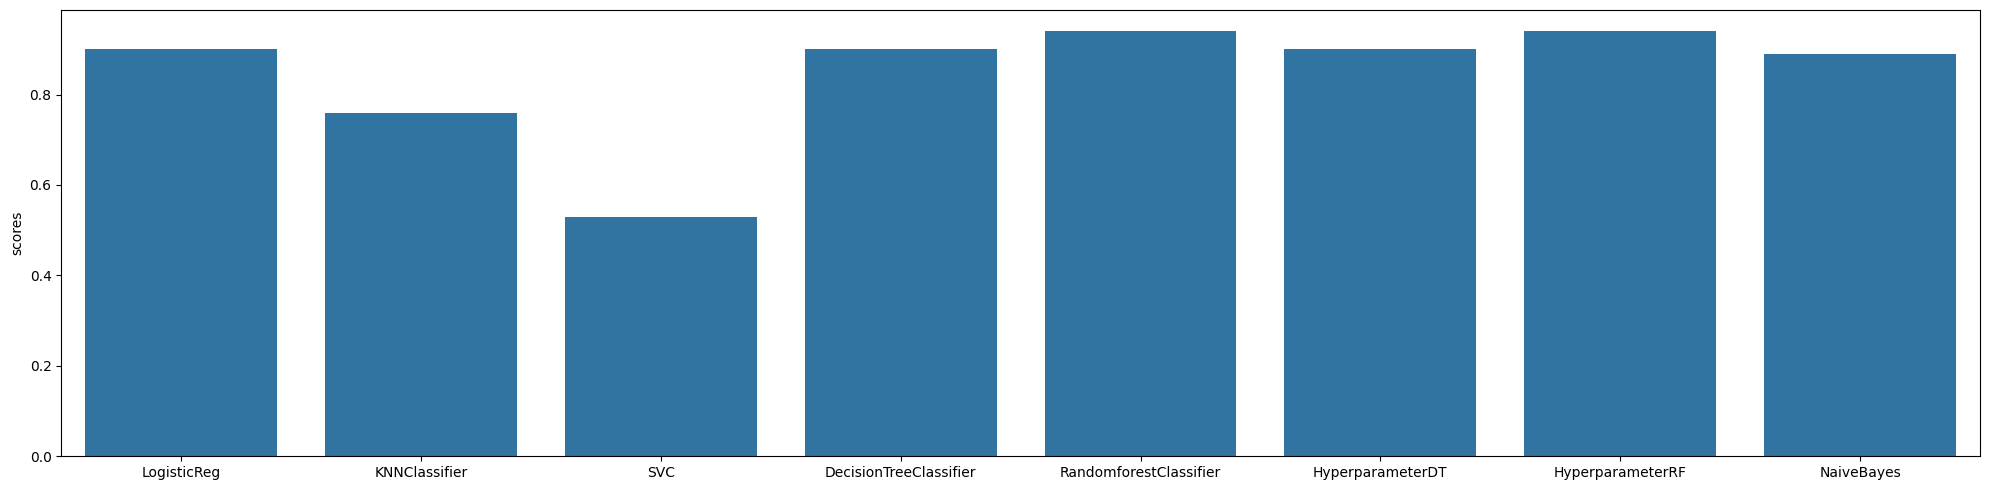

In [182]:
# Define the list of names and scores
names = ['LogisticReg', 'KNNClassifier', 'SVC', 'DecisionTreeClassifier', 'RandomforestClassifier', 'HyperparameterDT', 'HyperparameterRF', 'NaiveBayes']
l1 = [0.90, 0.76, 0.53, 0.90, 0.94, 0.90, 0.94, 0.89]

# Create the bar plot with Seaborn
plt.figure(figsize=(20, 5))
plt.ylabel('scores')
sns.barplot(x=names, y=l1)
plt.tight_layout()

# Show the plot
plt.show()

CONCLUSION:

After Analysis of metrics for each model we can conclude that Random Forest with Hyperparameter tuning is the best model for Production.

Naive Bayes and Random forest with Hyperparameter tuning, both has same accuracy score for test data and both have same f1_score also, but the only difference in training score

Training score of Random Forest with Hyperparameter tuning is Greater than Naive Bayes, that's why we can choose Random Forest with Hyperparameter tuning is best model. The model also more Generalized.

SVM Model is underfitted

without tuning the model both decision tree and random forest is overfitted, so after tuning both were performed well.

KNN model also performs Average for both test data and training data

Hence Random Forest with Hyperparameter tuning is Best.